# Разработка решения для увеличения покупательской активнойсти. Проект по спринту "Обучение с учителем: качество модели"

## Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

## Описание данных

Данные для работы находятся в нескольких таблицах.
###### market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


###### market_money.csv
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период.


###### market_time.csv
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.


- money.csv
- Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

###### money.csv
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## План работы

Решать задачу нужно в два этапа:
- Разработать модель, которая предскажет вероятность снижения покупательской активности.
- Выделить сегмент покупателей, проанализировать его и предложить, как увеличить его покупательскую активность. По желанию  можно проанализировать больше одного сегмента.

Ниже несколько примеров сегментов, но можно также можете выделить свой:

- Группа клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности.
- Группа клиентов, которые покупают только технику, то есть товары с длинным жизненным циклом.
- Группа клиентов, которые покупают товары из категории «Товары для себя» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
- Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью.

###### Шаг 1. Загрузка данных
1.1 Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:
- /datasets/market_file.csv
- /datasets/market_money.csv
/datasets/market_time.csv
/datasets/money.csv
Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.  
1.2 Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.
###### Шаг 2. Предобработка данных
Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.
###### Шаг 3. Исследовательский анализ данных
Проведите исследовательский анализ данных из каждой таблицы. Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Оформите выводы по результатам шага.
###### Шаг 4. Объединение таблиц
4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся.


4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.
###### Шаг 5. Корреляционный анализ
Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.
###### Шаг 6. Использование пайплайнов
Примените все изученные модели. Для этого используйте пайплайны.


6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.


6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.


6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:
использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;
использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.
###### Шаг 7. Анализ важности признаков
7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 


7.2 Сделайте выводы о значимости признаков:
какие признаки мало значимы для модели;
какие признаки сильнее всего влияют на целевой признак;
как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.
###### Шаг 8. Сегментация покупателей
8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.


8.2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
Проведите графическое и аналитическое исследование группы покупателей.
Сделайте предложения по работе с сегментом для увеличения покупательской активности.


8.3 Сделайте выводы о сегментах:
какой сегмент вы взяли для дополнительного исследования,
какие предложения вы сделали и почему.
###### Шаг 9. Общий вывод
Сделайте общий вывод:
- опишите задачу;
- опишите исходные данные и проведённую предобработку;
- напишите, что вы сделали для поиска лучшей модели;
- укажите лучшую модель;
- добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.

## Шаг 1. Загрузка данных

### Импорт необходимых библиотек и инструментов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
#перед использованием метода shap установим инструмент
!pip install shap

In [3]:
import shap

Также нам потребуется обновленная библиотека Scikit-learn

In [4]:
!pip install -U scikit-learn

### Считывание данных и изучение общей информации

In [5]:
#загрузим данные
market_file = pd.read_csv('/datasets/market_file.csv')
market_money = pd.read_csv('/datasets/market_money.csv')
market_time = pd.read_csv('/datasets/market_time.csv')
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

In [6]:
#посмотрим на первые пять строк датасетов
display(market_file.head(5))
display(market_money.head(5))
display(market_time.head(5))
display(money.head(5))

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Вывод по шагу 1
- импортировали библиотеки и инструменты
- загрузили данные
- при загрузке прибыли использовали разделитель ';', а разделитель целой части чисел от дробной - ','
- данные загрузились верно

##  Шаг 2. Предобработка данных

In [7]:
#приведем названия столбцов к змеиному регистру
market_file.columns = market_file.columns.str.lower().str.replace(' ', '_')
market_money.columns = market_money.columns.str.lower().str.replace(' ', '_')
market_time.columns = market_time.columns.str.lower().str.replace(' ', '_')
money.columns = money.columns.str.lower().str.replace(' ', '_')

In [8]:
#посмотрим на общую информацию
display(market_file.info())
display(market_money.info())
display(market_time.info())
display(money.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Посмотрим на значения текстовых столбцов, чтобы исключить ошибки и неверное написание

In [9]:
#посмотрим на уникальные значения столбцов с текстовыми значениями
display(market_file['тип_сервиса'].unique())
display(market_file['разрешить_сообщать'].unique())
display(market_file['популярная_категория'].unique())
display(market_money['период'].unique())
display(market_time['период'].unique())

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [10]:
#исправим ошибки
market_file['тип_сервиса'].replace({"стандартт": "стандарт"}, inplace=True)
market_time['период'].replace({"предыдцщий_месяц": "предыдущий_месяц"}, inplace=True)

In [11]:
#проверка
display(market_file['тип_сервиса'].unique())
display(market_file['разрешить_сообщать'].unique())
display(market_file['популярная_категория'].unique())
display(market_money['период'].unique())
display(market_time['период'].unique())

array(['премиум', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Исправили граматические ошибки в словах "стандартт" и "предыдцщий месяц"

In [12]:
#проверим на пропуски
display(market_file.isnull().sum())
display(market_time.isnull().sum())
display(market_money.isnull().sum())
display(money.isnull().sum())

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

id        0
период    0
минут     0
dtype: int64

id         0
период     0
выручка    0
dtype: int64

id         0
прибыль    0
dtype: int64

Пропуски отсутствуют

In [13]:
#проверим на дубликаты
display(market_file.duplicated().sum())
display(market_time.duplicated().sum())
display(market_money.duplicated().sum())
display(money.duplicated().sum())

0

0

0

0

Пропусков и дубликатов нет

### Вывод по шагу 2
- проверили на пропуски. Пропуски отсутствуют
- проверили на дубликаты. Дубликаты отсутствуют
- проверили текстовые столбцы и исправили ошибки

## Шаг 3. Исследовательский анализ данных

Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в каждом из последних трех месяцев

In [14]:
# Переформатирование данных с помощью pivot_table
market_money = market_money.pivot_table(index='id', columns='период', values='выручка')

# Убедимся, что имена колонок правильные
market_money.columns.name = None

# Фильтрация клиентов с выручкой больше 0 в каждом месяце
market_money = market_money[(market_money['препредыдущий_месяц'] > 0) & 
                       (market_money['текущий_месяц'] > 0) & 
                       (market_money['предыдущий_месяц'] > 0)]

# Сброс индекса для удобства
market_money.reset_index(inplace=True)

In [15]:
#посмотрим на обновленный датасет (первые 5 строк)
market_money.head(5)

,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


In [16]:
#перепроверим на отсутствие активности
(market_money.apply(lambda row: any(row == 0), axis=1)).sum()

0

In [17]:
#создадим список для фильтрации других таблиц
valid_ids = market_money['id'].unique()

# Фильтрация market_file и market_time
market_file = market_file[market_file['id'].isin(valid_ids)]
market_time = market_time[market_time['id'].isin(valid_ids)]

In [18]:
#взглянем на отфильтрованные таблицы
display(market_file.head(5))
display(market_time.head(5))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


,id,период,минут
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдущий_месяц,8
6,215351,текущий_месяц,13


Сразу же разделим данные по времени по отдельным столбцам

In [19]:
# Пример создания pivot_table
market_time = market_time.pivot_table(index='id', columns='период', values='минут')

# Убедимся, что имена колонок правильные
market_time.columns.name = None

# Сбросим индекс, чтобы вернуть 'id' в столбцы
market_time = market_time.reset_index()

In [20]:
#посмотрим на обновленный датасет (первые 5 строк)
market_time.head(5)

,id,предыдущий_месяц,текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


###### Исследовательский анализ данных таблицы market_file

In [21]:
#посмотрим на общее описание
market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4.254433,4.009252,602.993832,0.320547,3.267540,2.841172,4.184271,8.186584
std,374.578554,1.015618,0.696048,249.101456,0.249657,1.354623,1.973451,1.950973,3.977061
min,215349.000000,0.900000,3.000000,121.000000,0.110000,1.000000,0.000000,0.000000,1.000000
25%,215675.000000,3.700000,4.000000,410.000000,0.170000,2.000000,1.000000,3.000000,5.000000
50%,215999.000000,4.200000,4.000000,607.000000,0.240000,3.000000,3.000000,4.000000,8.000000
75%,216323.000000,4.900000,4.000000,806.000000,0.300000,4.000000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.000000,10.000000,9.000000,20.000000


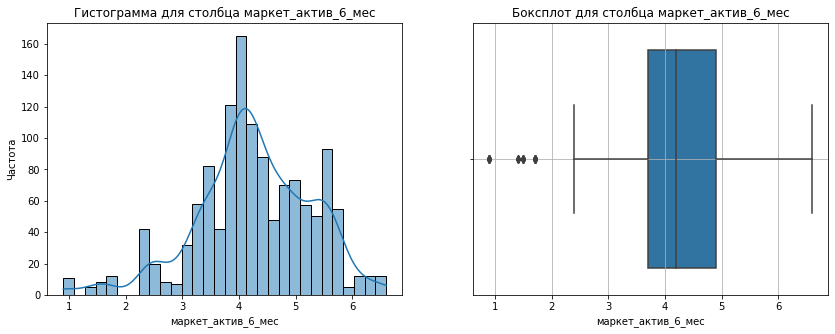

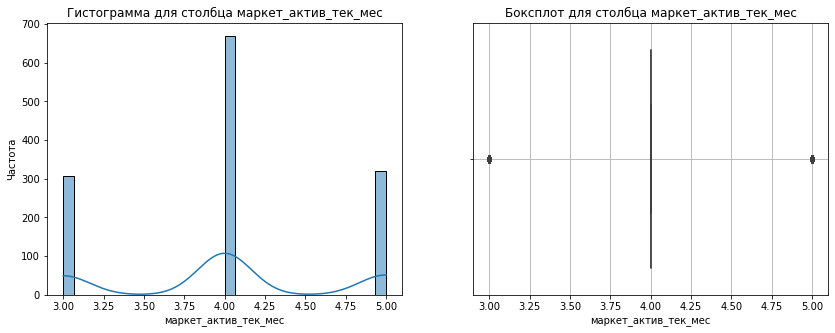

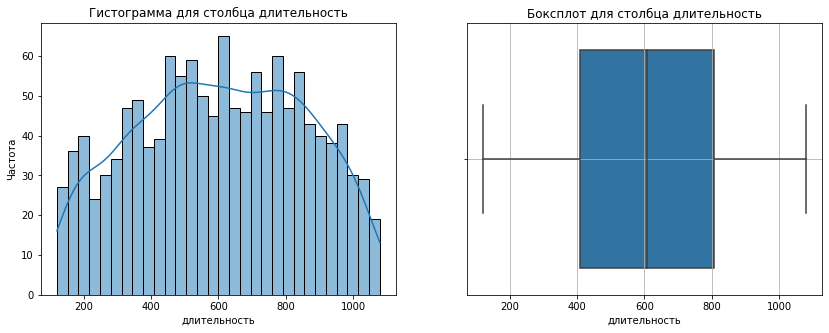

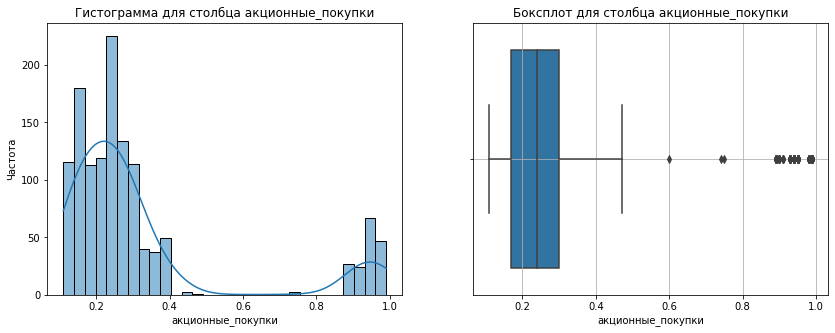

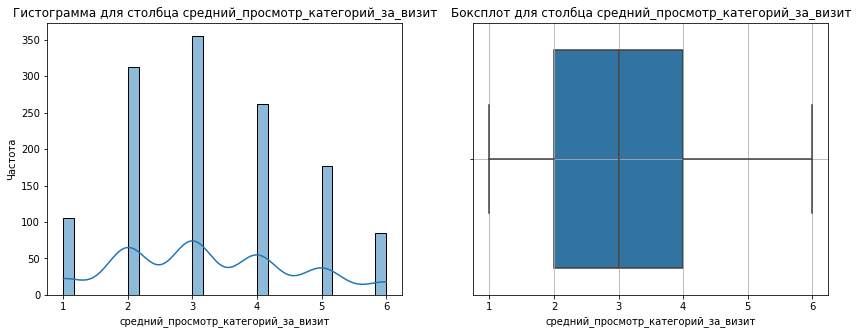

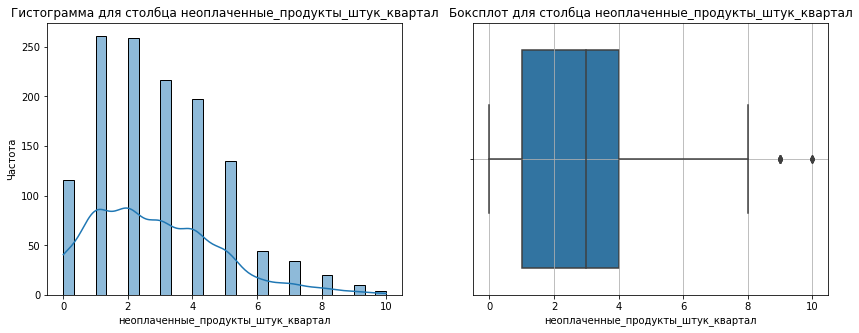

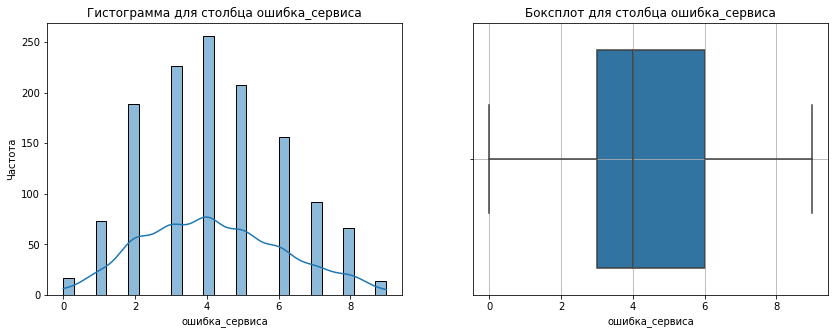

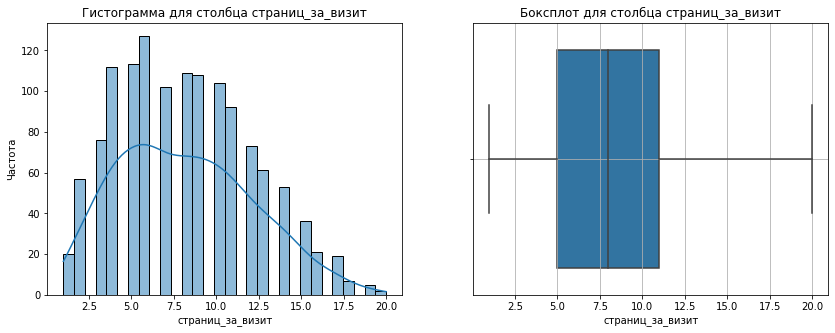

In [22]:
#Посмотрим на распределение числовых столбцов
def plot_histograms_and_boxplots(dataframe, numerical_columns):
    for column in numerical_columns:
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))
        
        # Гистограмма
        sns.histplot(dataframe[column], bins=30, kde=True, ax=ax[0])
        ax[0].set_title(f'Гистограмма для столбца {column}')
        ax[0].set_xlabel(column)
        ax[0].set_ylabel('Частота')
        
        # Боксплот
        sns.boxplot(x=dataframe[column], ax=ax[1])
        ax[1].set_title(f'Боксплот для столбца {column}')
        ax[1].set_xlabel(column)
        
        plt.grid(True)
        plt.show()

# Определение числовых столбцов (исключая 'id')
numerical_columns = market_file.select_dtypes(include=['int64', 'float64']).columns.drop('id')

# Построение гистограмм и боксплотов для числовых столбцов
plot_histograms_and_boxplots(market_file, numerical_columns)

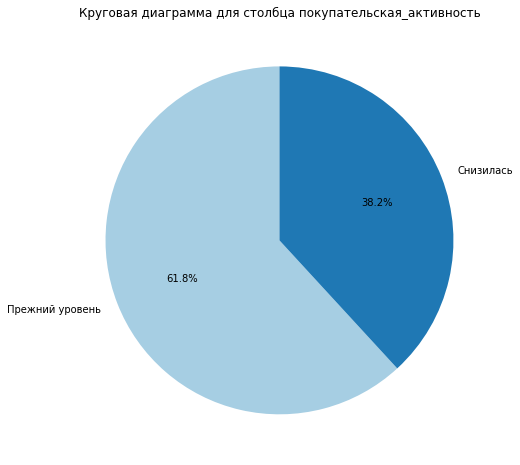

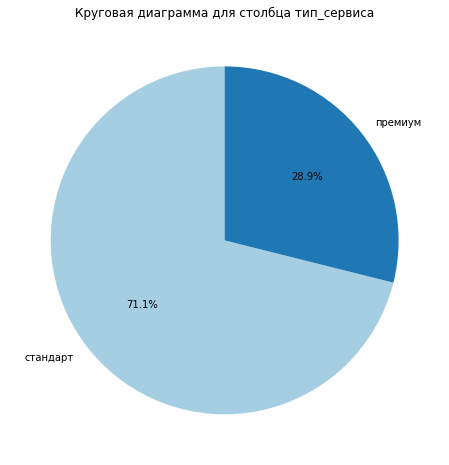

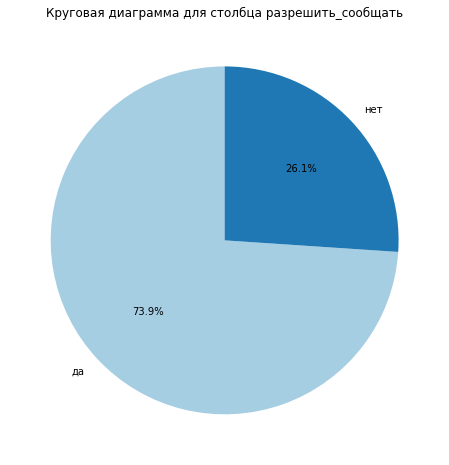

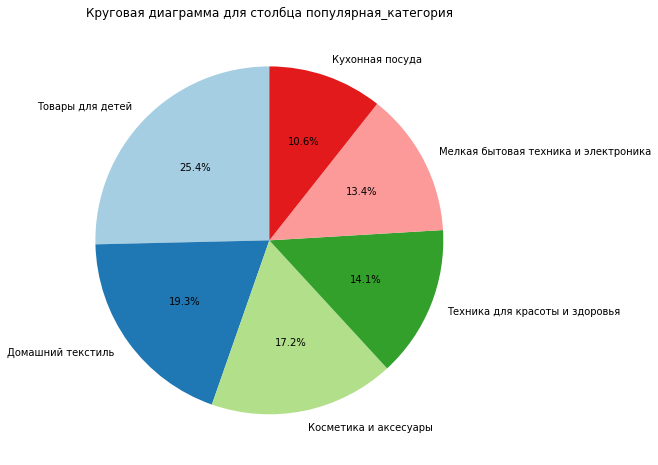

In [23]:
#посмотрим на круговые диаграммы нечисловых столбцов
def plot_pie_charts(dataframe, categorical_columns):
    for column in categorical_columns:
        plt.figure(figsize=(8, 8))
        dataframe[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
        plt.title(f'Круговая диаграмма для столбца {column}')
        plt.ylabel('')
        plt.show()

# Определение текстовых столбцов
categorical_columns = market_file.select_dtypes(include=['object']).columns

# Построение круговых диаграмм для текстовых столбцов
plot_pie_charts(market_file, categorical_columns)

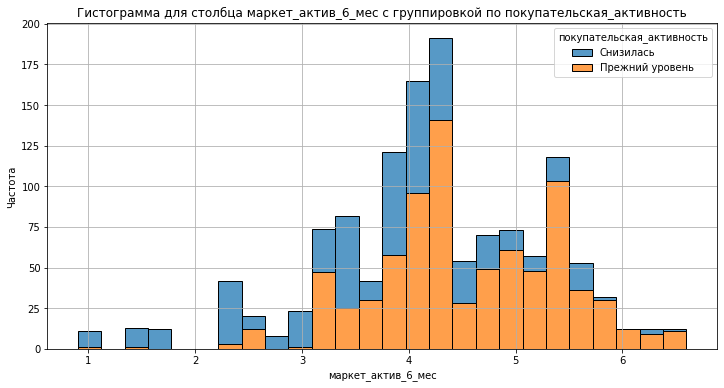

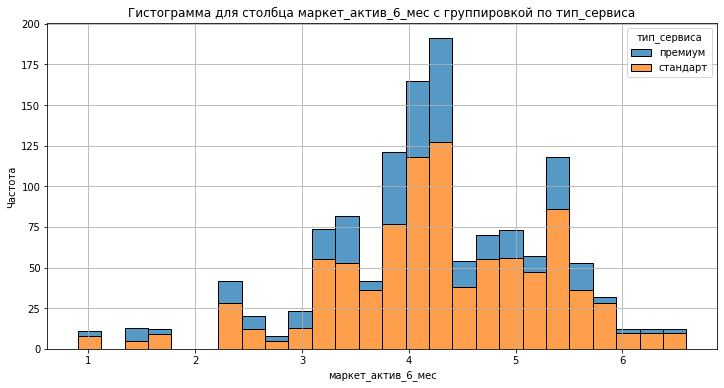

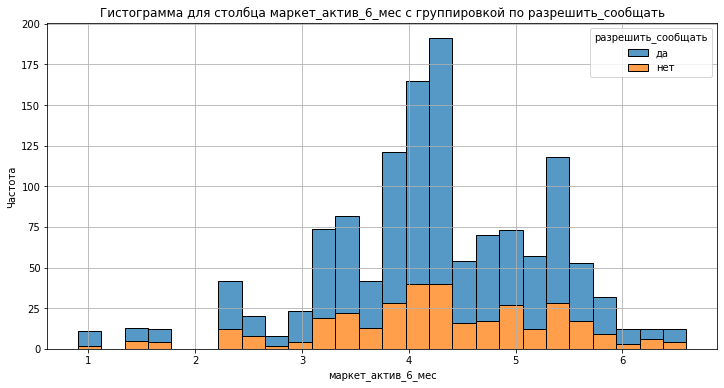

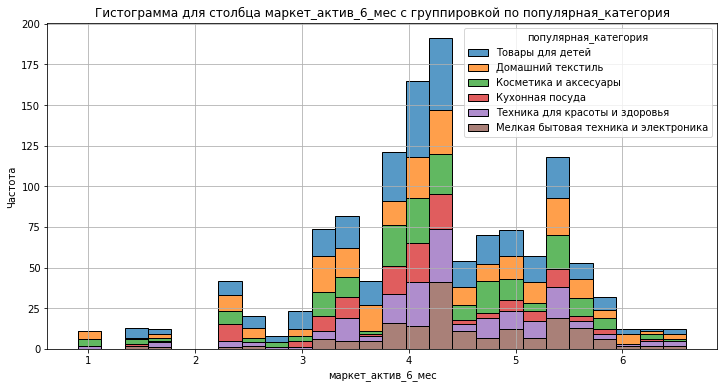

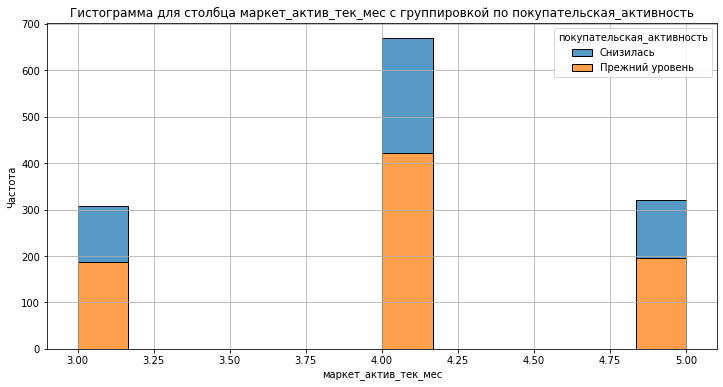

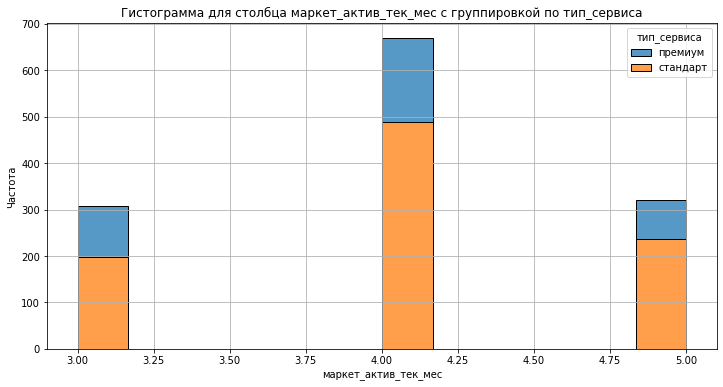

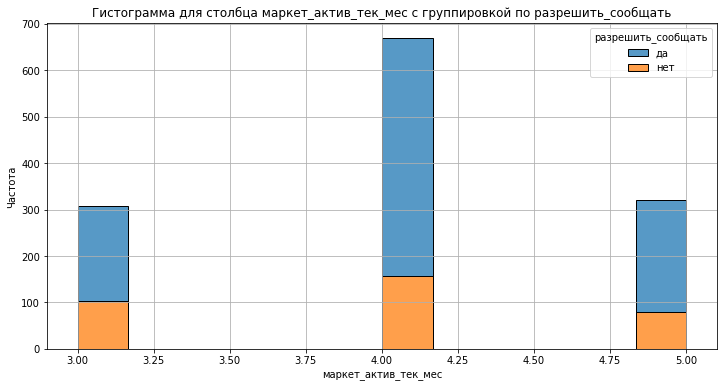

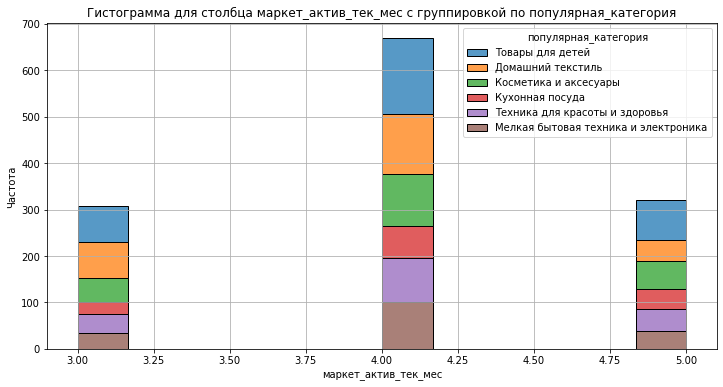

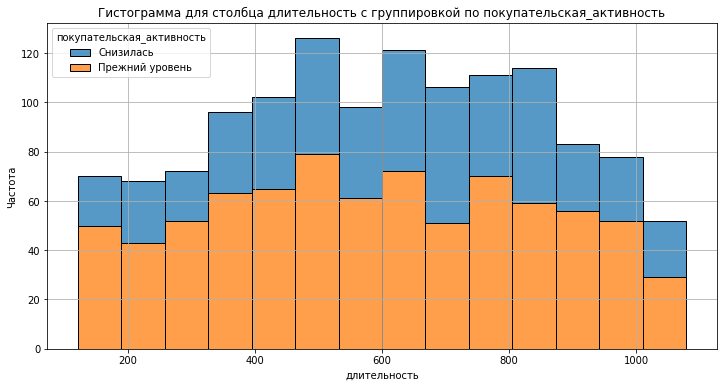

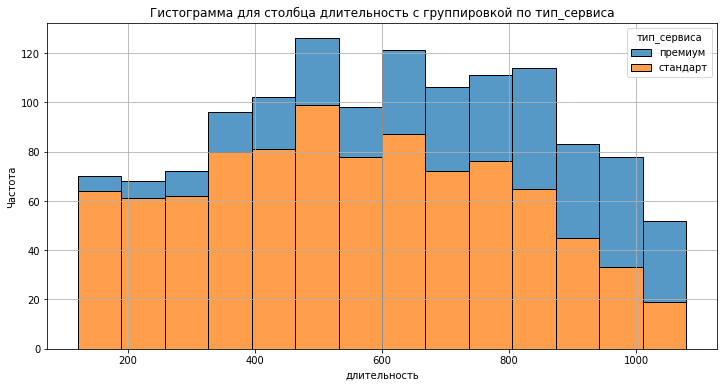

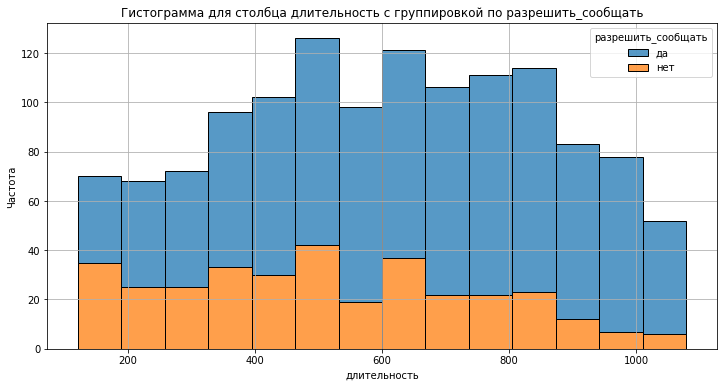

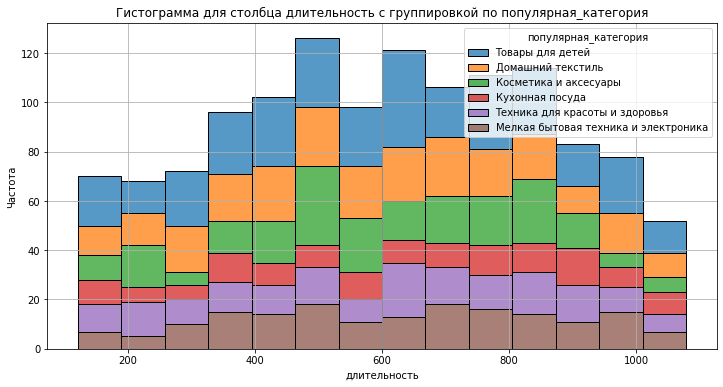

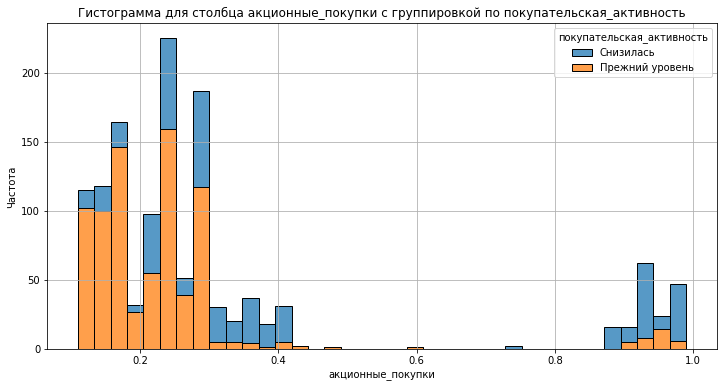

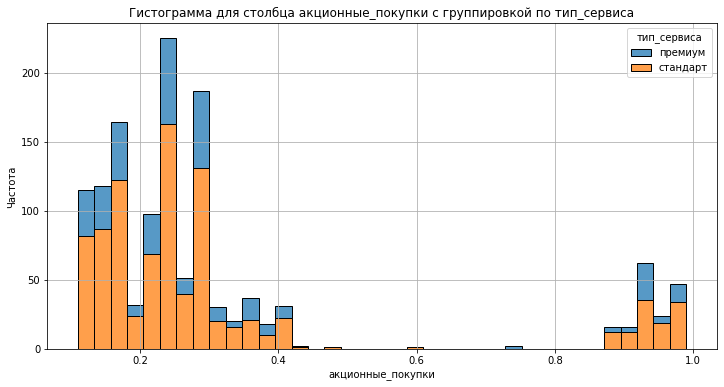

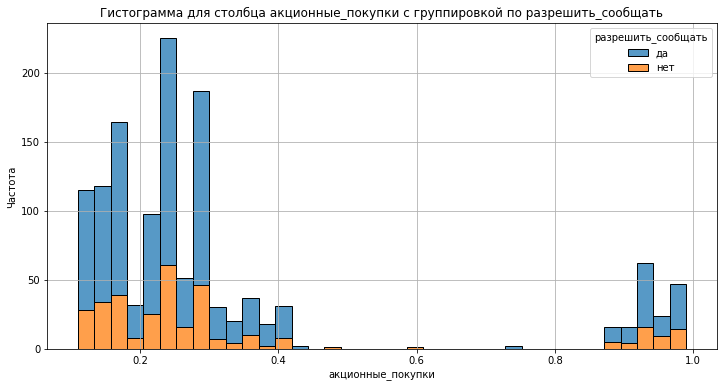

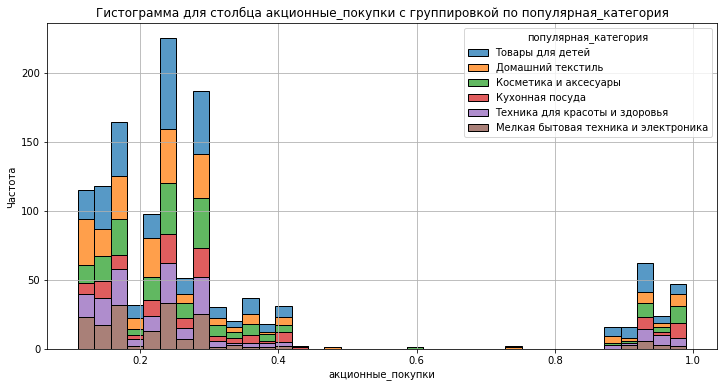

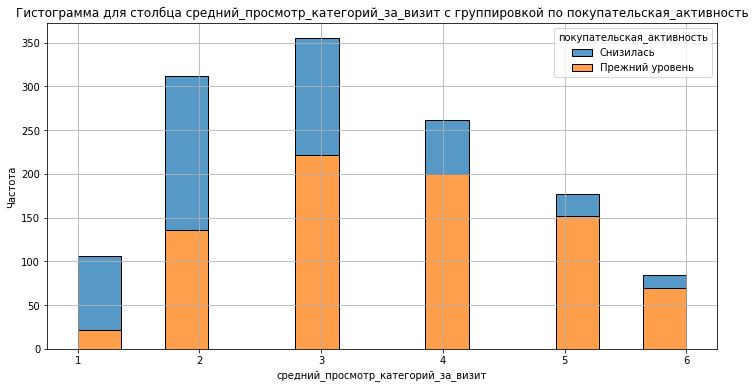

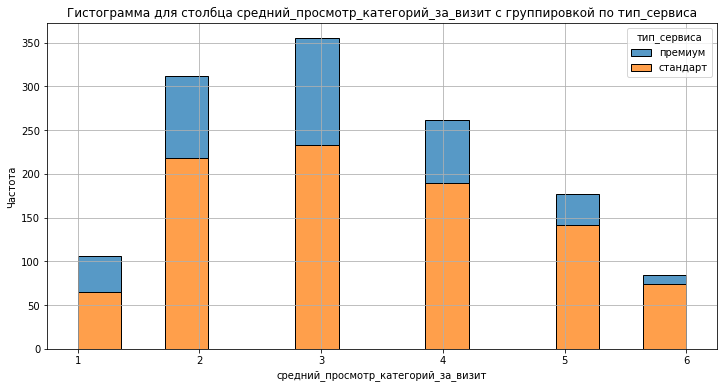

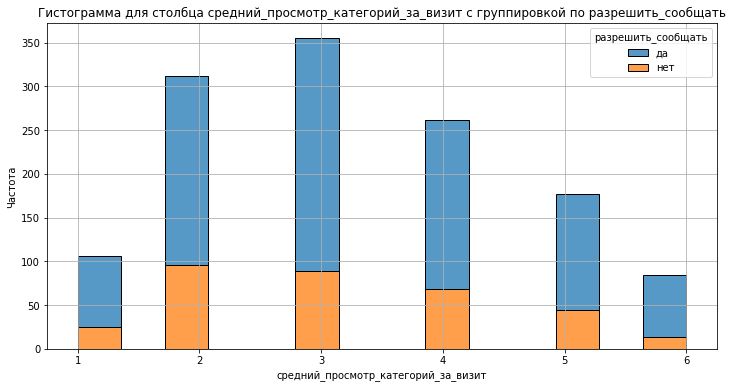

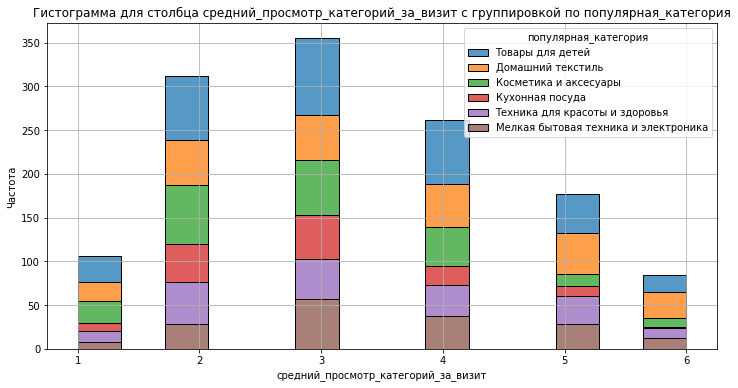

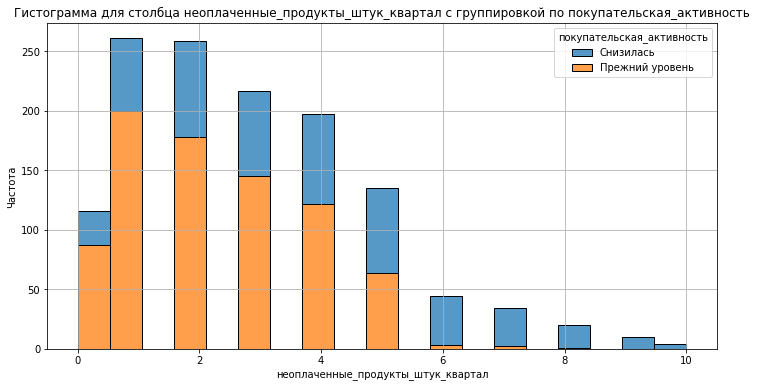

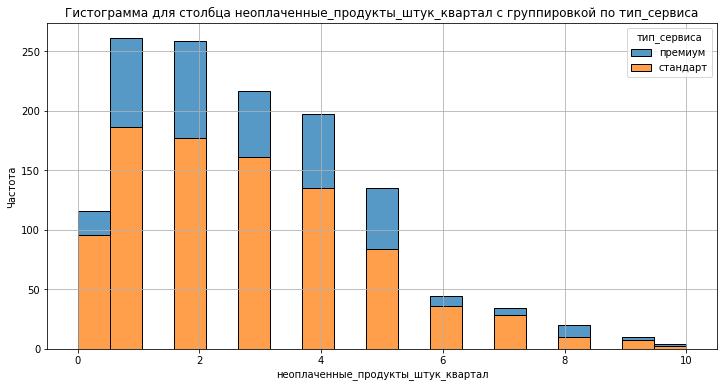

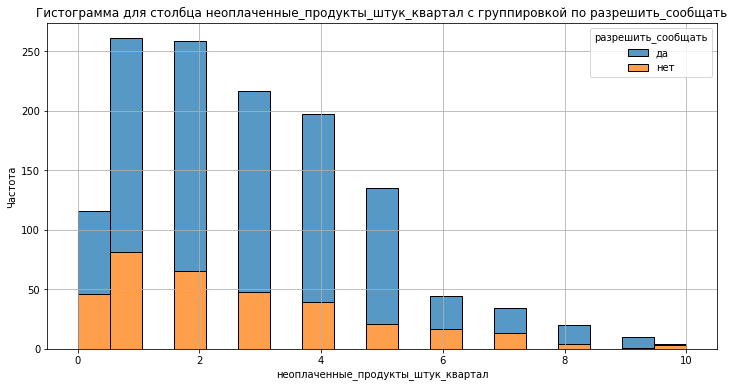

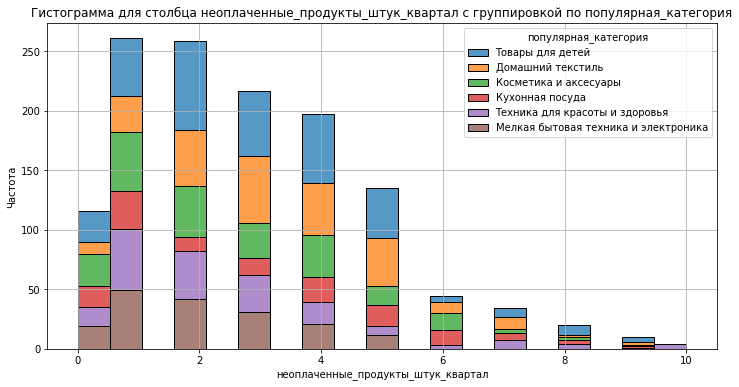

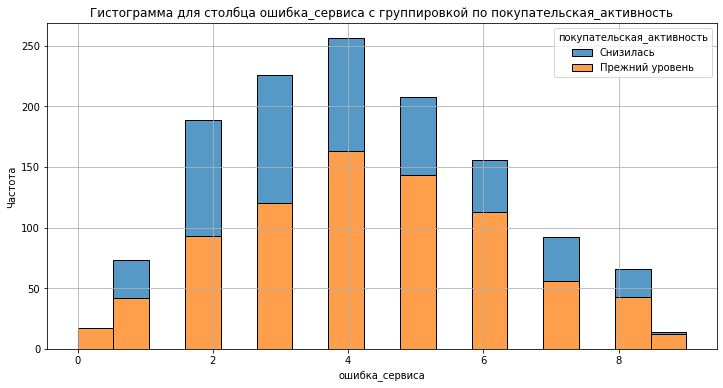

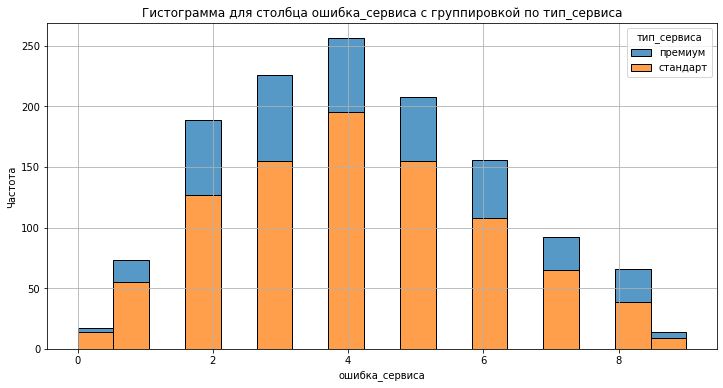

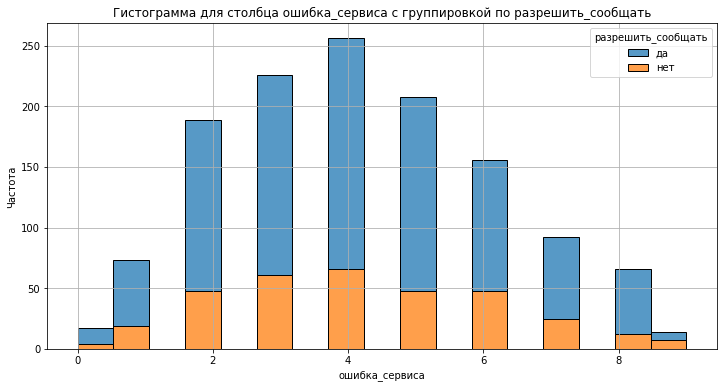

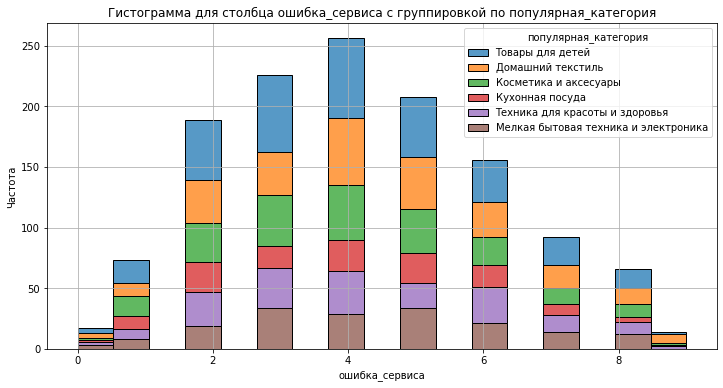

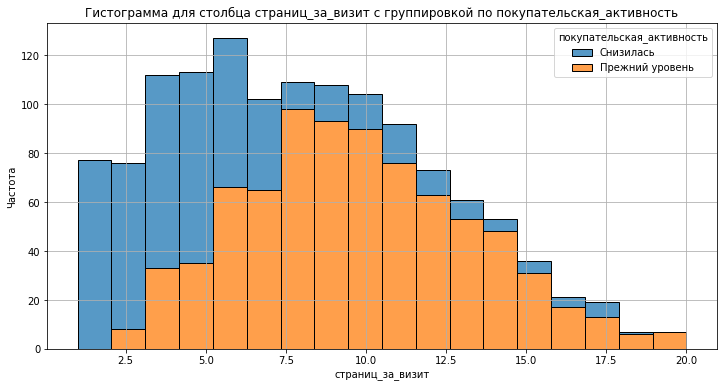

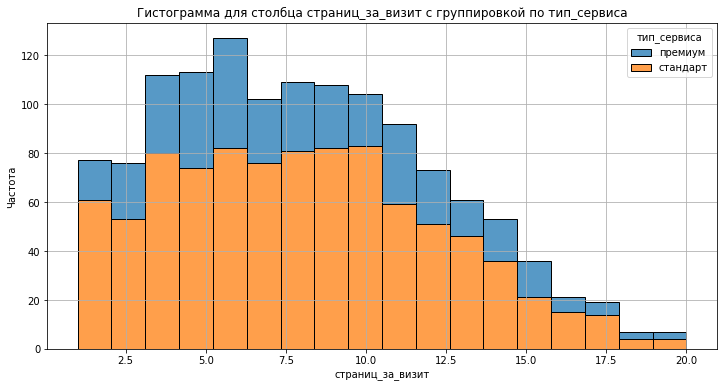

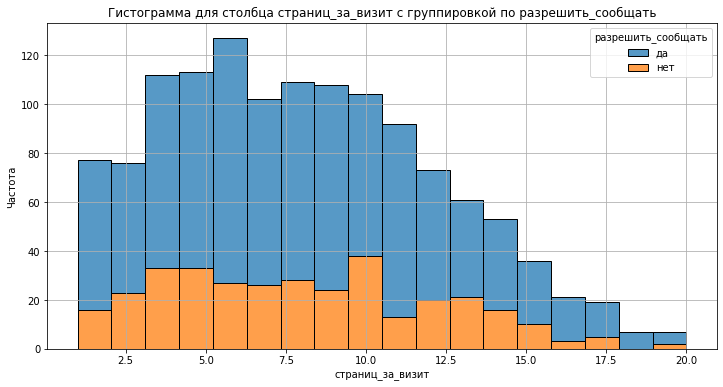

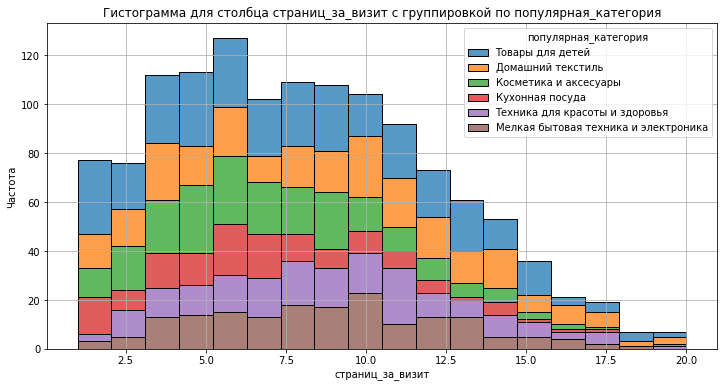

In [24]:
#построим гистограммы и сгруппируем по значения текстовых столбцов
def plot_histograms_by_group(dataframe, numerical_columns, categorical_columns):
    for num_col in numerical_columns:
        for cat_col in categorical_columns:
            plt.figure(figsize=(12, 6))
            sns.histplot(data=dataframe, x=num_col, hue=cat_col, multiple="stack", palette="tab10")
            plt.title(f'Гистограмма для столбца {num_col} с группировкой по {cat_col}')
            plt.xlabel(num_col)
            plt.ylabel('Частота')
            plt.grid(True)
            plt.show()

#Построение гистограмм для числовых столбцов с группировкой по текстовым столбцам
plot_histograms_by_group(market_file, numerical_columns, categorical_columns)

###### Видим следующее:
- Среднемесячное значение маркетинговых в большинстве - от 3 до 6
- Акционные покупки у большинства - до 0.4
- Средний просмотр категорий за визит - от 2 до 5
- Неоплаченные покупки - в основном до 6 штук в квартал
- Ошибки сервиса - от 2 до 6
- Страниц за визит - от 3 до 15
- Снизилась активность 38.2% клиентов
- Тип сервиса: 71.1%  - стандарт, 28.9% - премиум
- Разрешили сообщать об акциях 73.9%  клиентов
- Самая популярная категория: товары для детей (25.4%), наименее популярная - кухонная посуда (10.6%)

###### Исследовательский анализ данных таблицы market_time

In [25]:
#посмотрим на общее описание
market_time.describe()

,id,предыдущий_месяц,текущий_месяц
count,1297.000000,1297.000000,1297.000000
mean,215998.986893,13.469545,13.211257
std,374.578554,3.936323,4.220222
min,215349.000000,5.000000,4.000000
25%,215675.000000,11.000000,10.000000
50%,215999.000000,13.000000,13.000000
75%,216323.000000,17.000000,16.000000
max,216647.000000,23.000000,23.000000


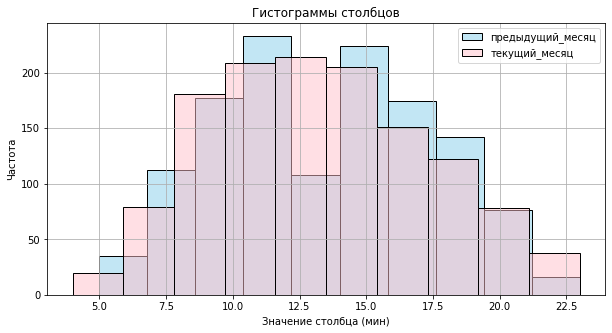

In [26]:
def plot_histograms(dataframe, numerical_columns, colors):
    plt.figure(figsize=(10, 5))
    for column, color in zip(numerical_columns, colors):
        sns.histplot(data=dataframe, x=column, bins=10, edgecolor='k', alpha=0.5, kde=False, color=color)
    plt.title('Гистограммы столбцов')
    plt.xlabel('Значение столбца (мин)')
    plt.ylabel('Частота')
    plt.legend(labels=numerical_columns)
    plt.grid(True)
    plt.show()

# Список числовых столбцов (исключая 'id')
numerical_columns = ['предыдущий_месяц', 'текущий_месяц']
# Список цветов для гистограмм
colors = ['skyblue', 'pink']

# Построение гистограмм для числовых столбцов
plot_histograms(market_time, numerical_columns, colors)

В отдельных значениях длительность пребывания на сайте магазина снизилась, в отдельных - увеличилась. По методу .describe() видно, что среднее время практически не изменилось, а медианное осталось на том же уровне

###### Исследовательский анализ данных таблицы market_money

In [27]:
#посмотрим на общее описание
market_money.describe()

,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
count,1297.000000,1297.000000,1297.000000,1297.000000
mean,215998.986893,4948.339630,4836.367772,5316.449268
std,374.578554,701.228571,333.438742,2942.469139
min,215349.000000,2890.000000,4098.000000,2758.700000
25%,215675.000000,4498.500000,4585.000000,4706.600000
50%,215999.000000,5005.500000,4812.000000,5180.300000
75%,216323.000000,5409.000000,5055.000000,5761.300000
max,216647.000000,6869.500000,5663.000000,106862.200000


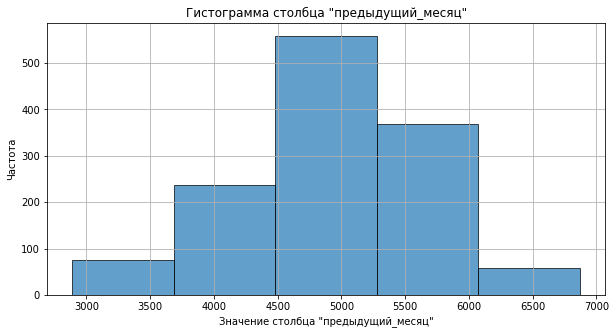

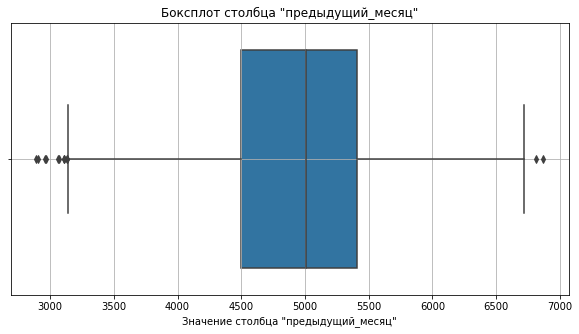

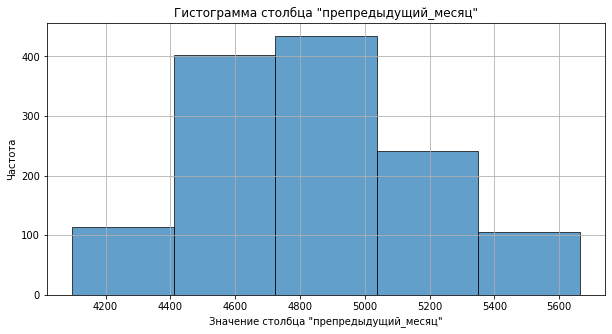

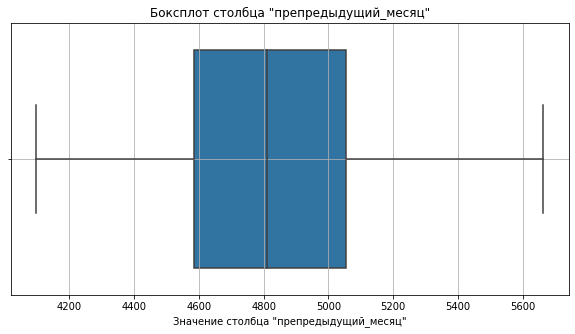

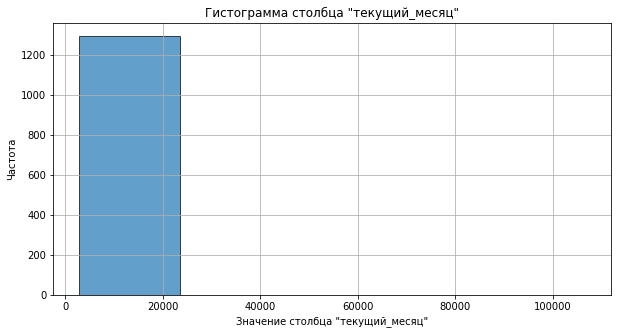

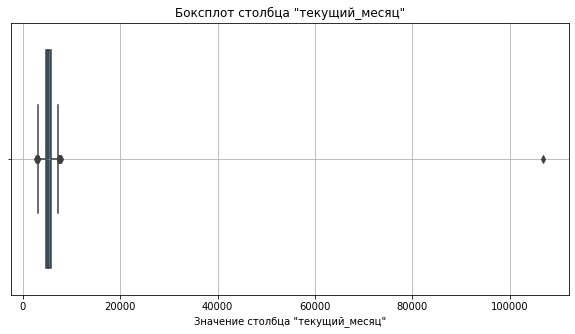

In [28]:
def plot_histograms_and_boxplots(dataframe, numerical_columns):
    for column in numerical_columns:
        # Гистограмма
        plt.figure(figsize=(10, 5))
        plt.hist(dataframe[column], bins=5, edgecolor='k', alpha=0.7)
        plt.title(f'Гистограмма столбца "{column}"')
        plt.xlabel(f'Значение столбца "{column}"')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        
        # Боксплот
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=dataframe[column])
        plt.title(f'Боксплот столбца "{column}"')
        plt.xlabel(f'Значение столбца "{column}"')
        plt.grid(True)
        plt.show()

# Список числовых столбцов (исключая 'id')
numerical_columns = ['предыдущий_месяц', 'препредыдущий_месяц', 'текущий_месяц']

# Построение гистограмм и боксплотов для числовых столбцов
plot_histograms_and_boxplots(market_money, numerical_columns)

###### Видим следующее
- в предыдущем месяце немного подрос средний и медианный показатель выручки с каждого клиента
- есть значительный выброс в текущем месяце, поэтому гистограмма и боксплот не информативны

In [29]:
#посмотрим на выброс
market_money.loc[market_money['текущий_месяц'] > 100000]

,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
29,215380,6077.0,5051.0,106862.2


In [30]:
#удалим выброс
market_money = market_money.query('id != 215380').reset_index(drop=True)

In [31]:
#посмотрим на датасет
market_money

,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5
...,...,...,...,...
1291,216643,3664.0,4704.0,4741.7
1292,216644,4729.0,5299.0,5353.0
1293,216645,5160.0,5334.0,5139.2
1294,216646,4923.0,4725.0,5224.6


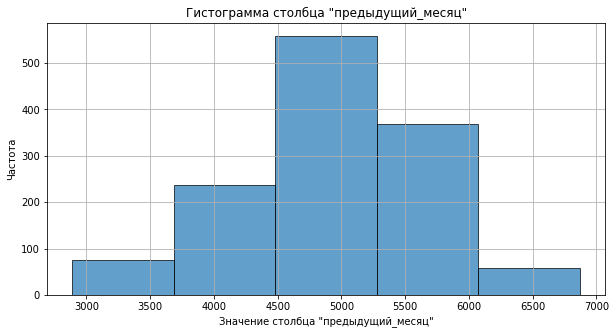

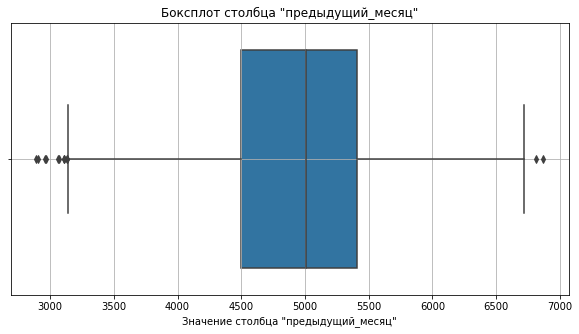

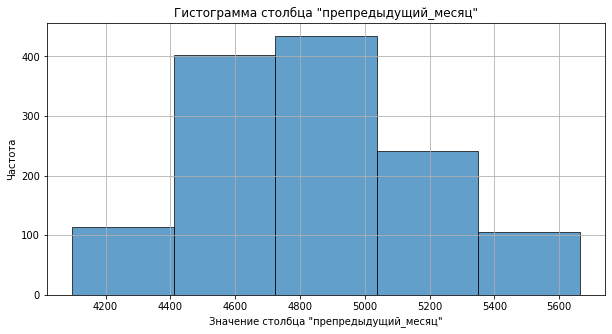

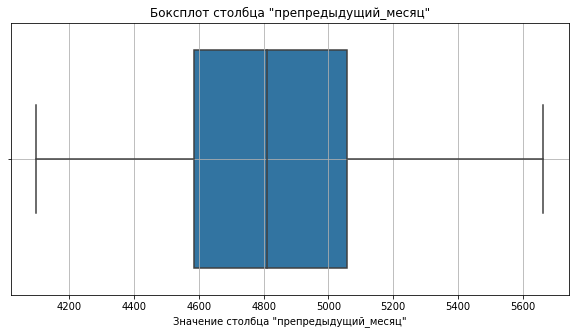

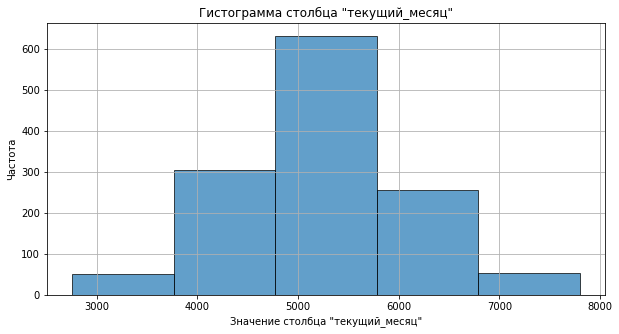

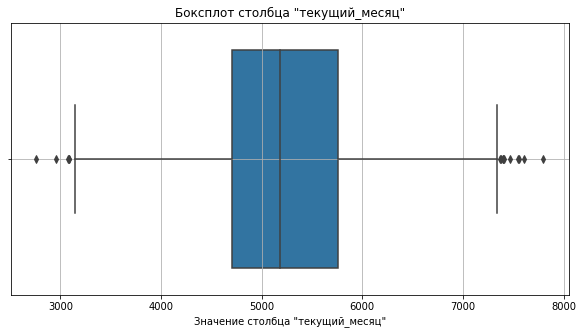

In [32]:
#после удаления выброса вновь посмотрим на гистограммы и боксплоты
def plot_histograms_and_boxplots(dataframe, numerical_columns):
    for column in numerical_columns:
        # Гистограмма
        plt.figure(figsize=(10, 5))
        plt.hist(dataframe[column], bins=5, edgecolor='k', alpha=0.7)
        plt.title(f'Гистограмма столбца "{column}"')
        plt.xlabel(f'Значение столбца "{column}"')
        plt.ylabel('Частота')
        plt.grid(True)
        plt.show()
        
        # Боксплот
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=dataframe[column])
        plt.title(f'Боксплот столбца "{column}"')
        plt.xlabel(f'Значение столбца "{column}"')
        plt.grid(True)
        plt.show()

# Построение гистограмм и боксплотов для числовых столбцов
plot_histograms_and_boxplots(market_money, numerical_columns)

Выводы:
- в предыдущем месяце немного подрос средний и медианный показатель выручки с каждого клиента по сравнению с препредыдущем месяцем
- в текущем месяце средний и медианный показатель стали еще выше

###### Исследовательский анализ данных таблицы money

In [33]:
#посмотрим на общее описание
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


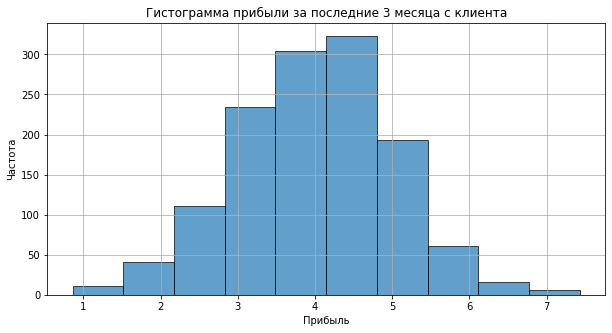

In [34]:
plt.figure(figsize=(10, 5))
plt.hist(money['прибыль'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Гистограмма прибыли за последние 3 месяца с клиента')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Прибыль с каждого клиента составляет в большинстве от 3 до 5 тыс. руб.

У нас был значительный выброс у клиента с id=215380, удалим записи этого клиента и в других таблицах

In [35]:
# Удаление строки, где 'id' == 215380 в остальных датасетах
market_file = market_file.query('id != 215380').reset_index(drop=True)
market_time = market_time.query('id != 215380').reset_index(drop=True)

In [36]:
#проверим таблицы
display(market_file.head(5))
display(market_time.head(5))
display(market_money.head(5))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4


,id,предыдущий_месяц,текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10


,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5


### Выводы по шагу 3
- Построили гистограммы, диаграммы и боксплоты
- Удалили выброс в таблице с выручкой
- Среднемесячное значение маркетинговых в большинстве - от 3 до 6
- Акционные покупки у большинства - до 0.4
- Средний просмотр категорий за визит - от 2 до 5
- Неоплаченные покупки - в основном до 6 штук в квартал
- Ошибки сервиса - от 2 до 6
- Страниц за визит - от 3 до 15
- Снизилась активность 38.2% клиентов
- Тип сервиса: 71.1%  - стандарт, 28.9% - премиум
- Разрешили сообщать об акциях 73.9%  клиентов
- Самая популярная категория: товары для детей (25.4%), наименее популярная - кухонная посуда (10.6%)
- В отдельных значениях длительность пребывания на сайте магазина снизилась, в отдельных - увеличилась. Среднее время практически не изменилось, а медианное осталось на том же уровне
- В предыдущем месяце немного подрос средний и медианный показатель выручки с каждого клиента по сравнению с препредыдущем месяцем
- В текущем месяце средний и медианный показатель стали еще выше
- Прибыль с каждого клиента составляет в большинстве от 3 до 5 тыс. руб.

## Шаг 4. Объединение таблиц

In [37]:
# Объединение таблиц
market_df = market_file.merge(market_money, on='id').merge(market_time, on='id')

# Проверка результата объединения
display(market_df.head())
display(market_df.info())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   покупательская_активность            1296 non-null   object 
 2   тип_сервиса                          1296 non-null   object 
 3   разрешить_сообщать                   1296 non-null   object 
 4   маркет_актив_6_мес                   1296 non-null   float64
 5   маркет_актив_тек_мес                 1296 non-null   int64  
 6   длительность                         1296 non-null   int64  
 7   акционные_покупки                    1296 non-null   float64
 8   популярная_категория                 1296 non-null   object 
 9   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  ошибка_сервиса                

None

In [38]:
#для удобства переименуем столбцы с выручкой и временем на сайте
market_df.rename(columns={
    'предыдущий_месяц_x': 'предыдущий_месяц (выручка)',
    'препредыдущий_месяц': 'препредыдущий_месяц_(выручка)',
    'текущий_месяц_x': 'текущий_месяц_x_(выручка)',
    'предыдущий_месяц_y': 'предыдущий_месяц_(время_на_сайте)',
    'текущий_месяц_y': 'текущий_месяц_(время_на_сайте)'
}, inplace=True)

# Проверка результатов
display(market_df)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц (выручка),препредыдущий_месяц_(выручка),текущий_месяц_x_(выручка),предыдущий_месяц_(время_на_сайте),текущий_месяц_(время_на_сайте)
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


Столбец с 'id' нам больше не понадобятся, поэтому удалим его, делая индекс

In [39]:
market_df.set_index('id', inplace=True)

In [40]:
market_df.head(5)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц (выручка),препредыдущий_месяц_(выручка),текущий_месяц_x_(выручка),предыдущий_месяц_(время_на_сайте),текущий_месяц_(время_на_сайте)
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


### Вывод по шагу 4
- объединили таблицы методом merge по столбцу 'id'
- удалили столбец 'id', сделали его индексом
- переименовали столбцы, чтобы отличать столбцы с выручкой от столбцов с временем

## Шаг 5. Корреляционный анализ

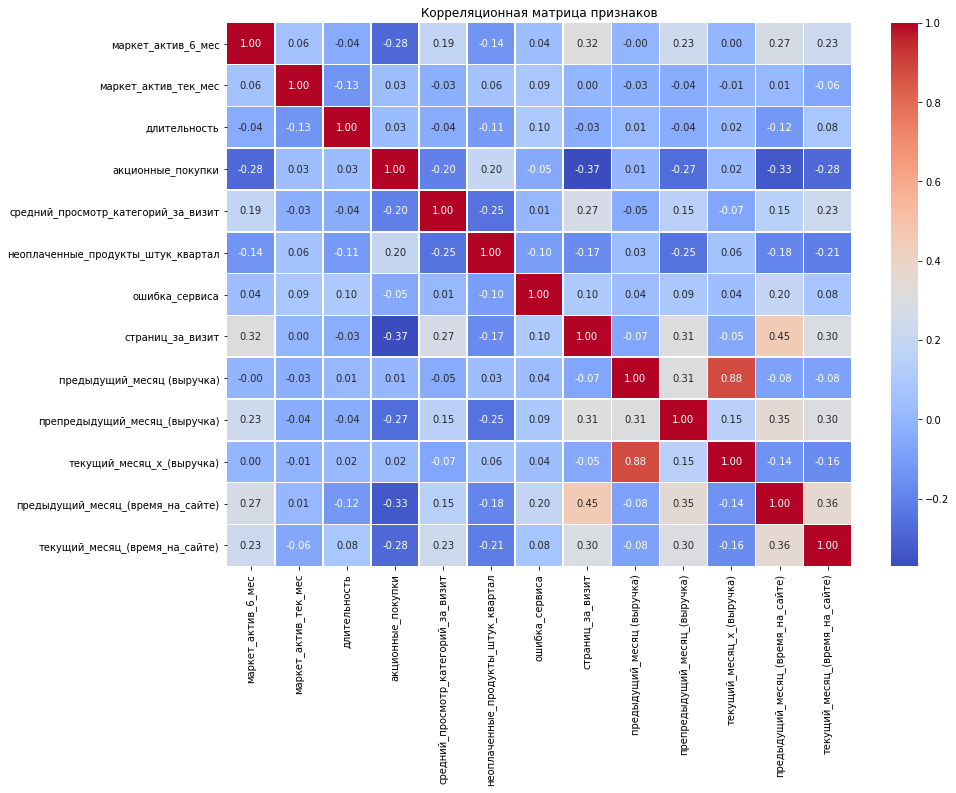

In [41]:
# Сначала выберем числовые столбцы
numerical_columns = (market_df.select_dtypes(include=['int64', 'float64']).columns)

# Рассчитаем корреляционную матрицу
corr_matrix = market_df[numerical_columns].corr(method='spearman')

# Построим тепловую карту корреляционной матрицы
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()

In [42]:
X = market_df

# Преобразуем категориальные признаки в числовые
X = pd.get_dummies(X, drop_first=True)

# Добавляем константу для регрессии
X = sm.add_constant(X)

# Рассчитываем VIF для каждого признака
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Удаляем строку с константой, так как она не является признаком
vif_data = vif_data[vif_data["Feature"] != "const"]

# Вывод VIF
print(vif_data)

                                              Feature       VIF
1                                  маркет_актив_6_мес  1.259697
2                                маркет_актив_тек_мес  1.075766
3                                        длительность  1.255457
4                                   акционные_покупки  1.251170
5                 средний_просмотр_категорий_за_визит  1.300812
6                  неоплаченные_продукты_штук_квартал  1.296512
7                                      ошибка_сервиса  1.088488
8                                    страниц_за_визит  1.564487
9                          предыдущий_месяц (выручка)  4.452607
10                      препредыдущий_месяц_(выручка)  1.650347
11                          текущий_месяц_x_(выручка)  3.951888
12                  предыдущий_месяц_(время_на_сайте)  1.663412
13                     текущий_месяц_(время_на_сайте)  1.394447
14                покупательская_активность_Снизилась  2.179351
15                               тип_сер

Все признаки имеют значение VIF менее 5, поэтому это не вызывает серьезных проблем

### Вывод по шагу 5
- построили тепловую карту с коэффициентами
- построили таблицу со значениями VIF
- выручки предыдущего и текущего месяца имеют умеренную корреляцию. VIF данных столбцов составляют менее 5
- при использовании пайплайнов желательно использовать регуляризацию

## Шаг 6. Использование пайплайнов

Построим пайплайн. Будем пробовать 4 модели:
- kNN - модель k ближайших соседей
- SVC - метод опорных векторов
- логистическая регрессия
- дерево решений

Используем следующие гиперпараметры:
- для SVC: 'models__max_depth' - от 2 до 5, 'models__max_features' - от 2 до 5
- для kNN: число соседей - от 2 до 5
- для логистической регрессии - solver('liblinear'), penalty('l1'), С(от 1 до 5)

Скейлер - StandardScaler() и MinMaxScaler()


Метод перебора гиперпараметров - RandomizedSearchCV


Для определения лучшей модели используем метрику ROC-AUC

Использую метрику ROC-AUC по следующим причинам:
- ROC-AUC оценивает модель, независимо от того, сбалансированы ли классы
- ROC-AUC более робастен к проблемам с несбалансированными данными, так как учитывает как True Positive, так и False Positive случаи
- Это позволяет получить более точное представление о производительности модели, особенно в случаях, когда один класс встречается гораздо реже другого.

In [43]:
# Настройка параметров
RANDOM_STATE = 42
TEST_SIZE = 0.2

# Разделение данных на признаки и целевой признак
X = market_df.drop(columns=['покупательская_активность'])  # Убираем целевой признак из X
y = market_df['покупательская_активность']  # Целевой признак

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

# Создаем списки с названиями признаков
categorical_features_ohe = ['популярная_категория', 'разрешить_сообщать']  # для OHE
categorical_features_ordinal = ['тип_сервиса']  # для Ordinal Encoder
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Создаем пайплайны для подготовки признаков
categorical_transformer_ohe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='error', sparse_output=False, drop='first'))  # изменено на sparse_output=False
])

categorical_transformer_ordinal = Pipeline([
    ('ordinal', OrdinalEncoder())
])

numerical_transformer = Pipeline([
    ('scaler', StandardScaler())  # по умолчанию используем StandardScaler
])

# Объединяем трансформеры в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_ohe', categorical_transformer_ohe, categorical_features_ohe),
        ('cat_ordinal', categorical_transformer_ordinal, categorical_features_ordinal),
        ('num', numerical_transformer, numerical_features)  # объединили numerical_transformer для масштабирования
    ],
    remainder='passthrough'
)

# Создаем итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

# Определение гиперпараметров для поиска
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],  # перебор StandardScaler и MinMaxScaler
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],  # перебор StandardScaler и MinMaxScaler
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 5),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],  # перебор StandardScaler и MinMaxScaler
    },

    # словарь для модели SVC()
    {
        'models': [SVC(probability=True)],
        'models__C': range(1, 5),
        'models__kernel': ['linear', 'rbf'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],  # перебор StandardScaler и MinMaxScaler
    }
]

# Использование RandomizedSearchCV для поиска лучших гиперпараметров
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# Обучение модели
randomized_search.fit(X_train, y_train)

# Вывод лучших параметров и метрики на тренировочной выборке
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# Оценка на тестовых данных
y_test_proba = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_proba)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория',
                                                   'разрешить_сообщать']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['тип_сервиса']),
                                                 ('num',
                              

### Вывод по шагу 6
Лучшая модель - SVC (метод опорных векторов) с гиперпараметрами:
- С = 3
- ядро - линейное
- метрика лучшей модели на тренировочной выборке: 0.91
- метрика ROC-AUC на тестовой выборке: 0.92

## Шаг 7. Анализ важности признаков

Используя shap, построим график и барплот с самыми важными признаками

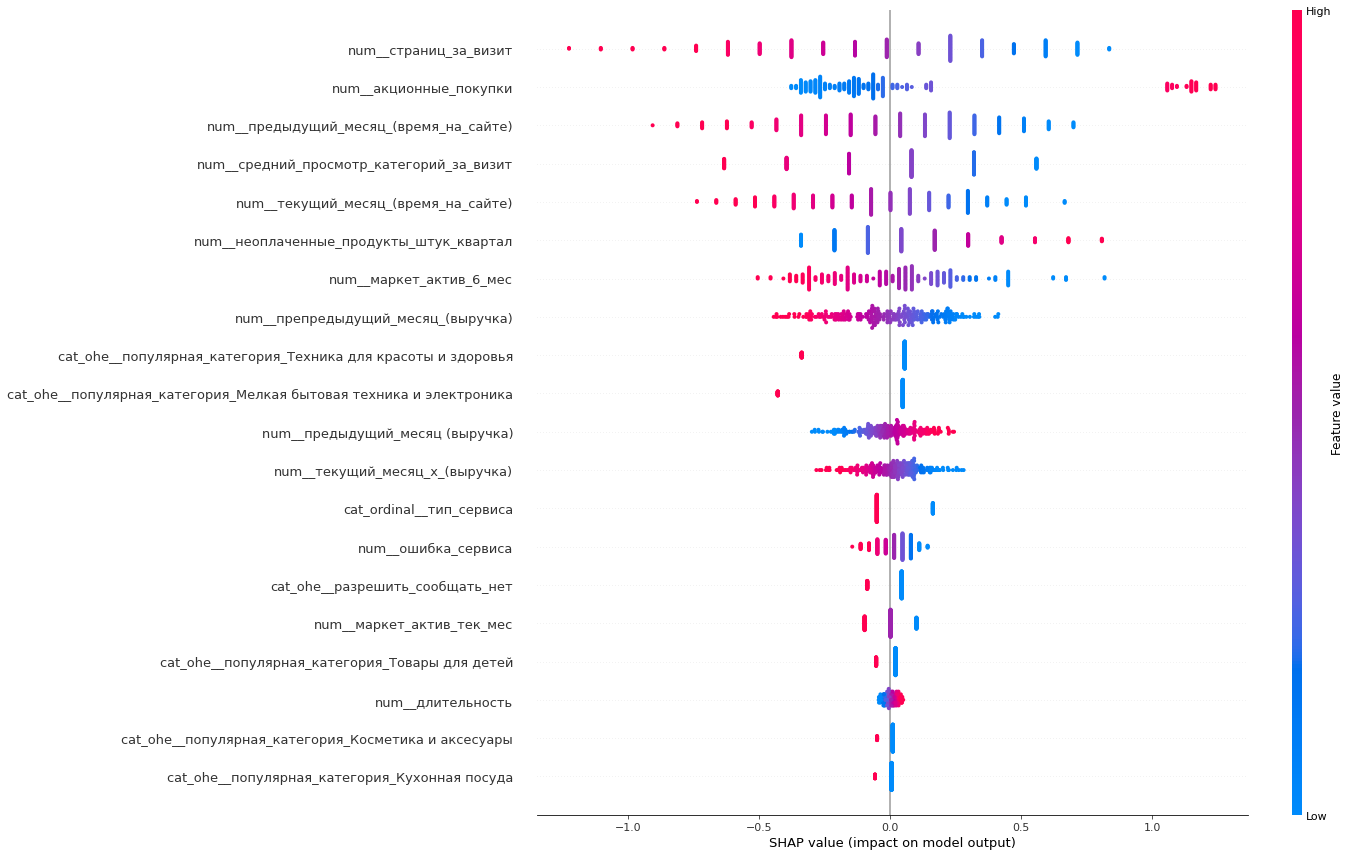

In [44]:
# Получаем лучший пайплайн из RandomizedSearchCV
best_model = randomized_search.best_estimator_

# Преобразование данных
preprocessor = best_model.named_steps['preprocessor']
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Создание аппроксимации для SVC
model_for_shap = best_model.named_steps['models']
if isinstance(model_for_shap, SVC):
    model_for_shap = SVC(kernel='linear', probability=True, random_state=RANDOM_STATE)  # Используем линейное ядро для SVC
    model_for_shap.fit(X_train_transformed, y_train)  # Обучаем модель на тренировочных данных

# Обучение объясняющей модели SHAP
explainer = shap.Explainer(model_for_shap, X_train_transformed)
shap_values = explainer(X_test_transformed)

# Получение имен признаков после применения ColumnTransformer
all_feature_names = preprocessor.get_feature_names_out()

# Визуализация важности признаков
shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names, plot_size=(20, 12))

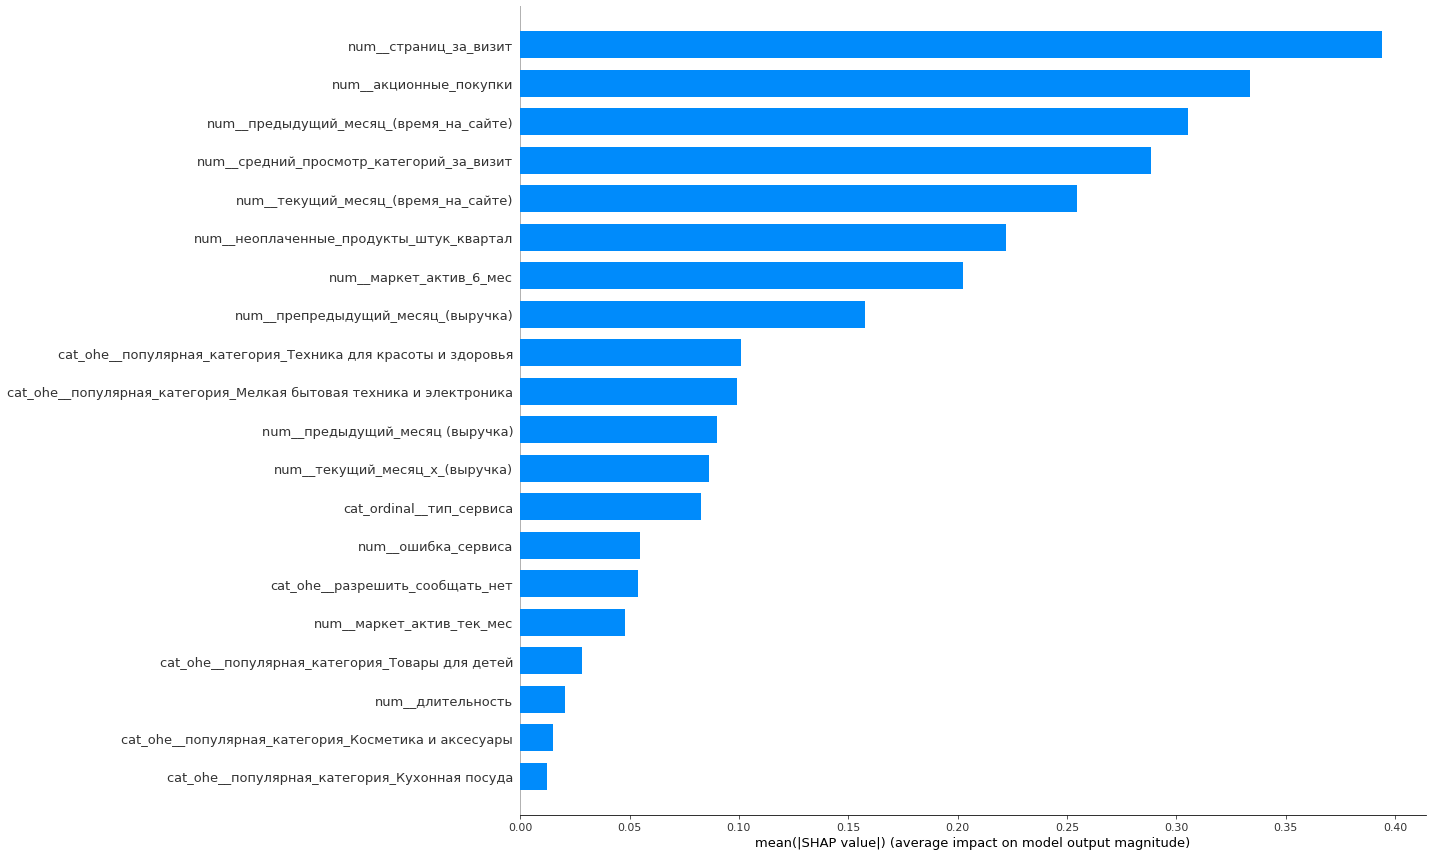

In [45]:
# Визуализация важности признаков с помощью bar plot
shap.summary_plot(shap_values, X_test_transformed, feature_names=all_feature_names, plot_type='bar', plot_size=(20, 12))

### Вывод по шагу 7
- построили график и барплот для анализа важности признаков

Самые важные признаки модели:
- страниц_за_визит
- акционные_покупки
- предыдущий_месяц_(время_на_сайте)
- текущий_месяц_(время на сайте)
- средний_просмотр_категорий_за_визит
- неоплаченные_продукты_штук_квартал
- маркет_актив_б_мес
- предыдущий месяц (выручка)
- препредыдущий_месяц (выручка)
- текущий_месяц_х (выручка)

Чем больше значение данных признаков, тем больше вероятности, что активность покупателя снизится

## Шаг 8. Сегментация покупателей

- Проанализируем сегмент клиентов с высокой выручкой и высокой вероятностью снижения покупательской активности
- Порог выручки - выше 70% клиентов
- Порог покупок по акции - 0.75 (75%)

Для любого бизнеса критически важно сохранять клиентов, которые приносят большую выручку (выше среднего). Кроме этого выручка показала достаточно важным признаком на графиках важности признаков

In [46]:
# Предсказание вероятности снижения покупательской активности для всех данных
y_proba = randomized_search.predict_proba(X)[:, 1]  # вероятность положительного класса
market_df['покупательская_активность_вероятность'] = y_proba

In [47]:
#проверим, что положительный класс - это снижение активности покупателей
market_df

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,предыдущий_месяц (выручка),препредыдущий_месяц_(выручка),текущий_месяц_x_(выручка),предыдущий_месяц_(время_на_сайте),текущий_месяц_(время_на_сайте),покупательская_активность_вероятность
id,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,0.971807
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.570239
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.928127
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.905982
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.870341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.139569
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,0.085339
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,0.116287


Посмотрим на диаграмму рассеяния нашего сегмента на фоне всех клиентов

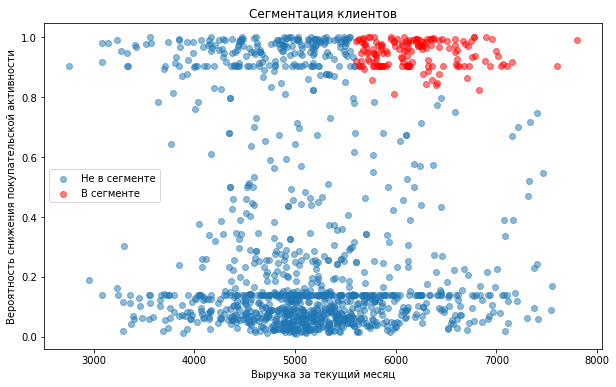

In [48]:
# Устанавливаем пороговые значения для сегментации
выручка_threshold = market_df['текущий_месяц_x_(выручка)'].quantile(0.7)
вероятность_threshold = 0.8  # 80% вероятности снижения покупательской активности

# Выделение сегмента
segmented_customers = market_df[
    (market_df['текущий_месяц_x_(выручка)'] > выручка_threshold) &
    (market_df['покупательская_активность_вероятность'] > вероятность_threshold)
]

# Выделение клиентов, которые не принадлежат сегменту
non_segmented_customers = market_df[
    (market_df['текущий_месяц_x_(выручка)'] <= выручка_threshold) |
    (market_df['покупательская_активность_вероятность'] <= вероятность_threshold)
]

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(non_segmented_customers['текущий_месяц_x_(выручка)'], non_segmented_customers['покупательская_активность_вероятность'], label='Не в сегменте', alpha=0.5)
plt.scatter(segmented_customers['текущий_месяц_x_(выручка)'], segmented_customers['покупательская_активность_вероятность'], label='В сегменте', alpha=0.5, color='r')
plt.xlabel('Выручка за текущий месяц')
plt.ylabel('Вероятность снижения покупательской активности')
plt.title('Сегментация клиентов')
plt.legend()
plt.show()

In [49]:
#посмотрим на общую информацию
segmented_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 215351 to 215933
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   покупательская_активность              154 non-null    object 
 1   тип_сервиса                            154 non-null    object 
 2   разрешить_сообщать                     154 non-null    object 
 3   маркет_актив_6_мес                     154 non-null    float64
 4   маркет_актив_тек_мес                   154 non-null    int64  
 5   длительность                           154 non-null    int64  
 6   акционные_покупки                      154 non-null    float64
 7   популярная_категория                   154 non-null    object 
 8   средний_просмотр_категорий_за_визит    154 non-null    int64  
 9   неоплаченные_продукты_штук_квартал     154 non-null    int64  
 10  ошибка_сервиса                         154 non-null    int64  
 11

У нас 141 клиент в описанном сегменте. Составим портрет таких клиентов

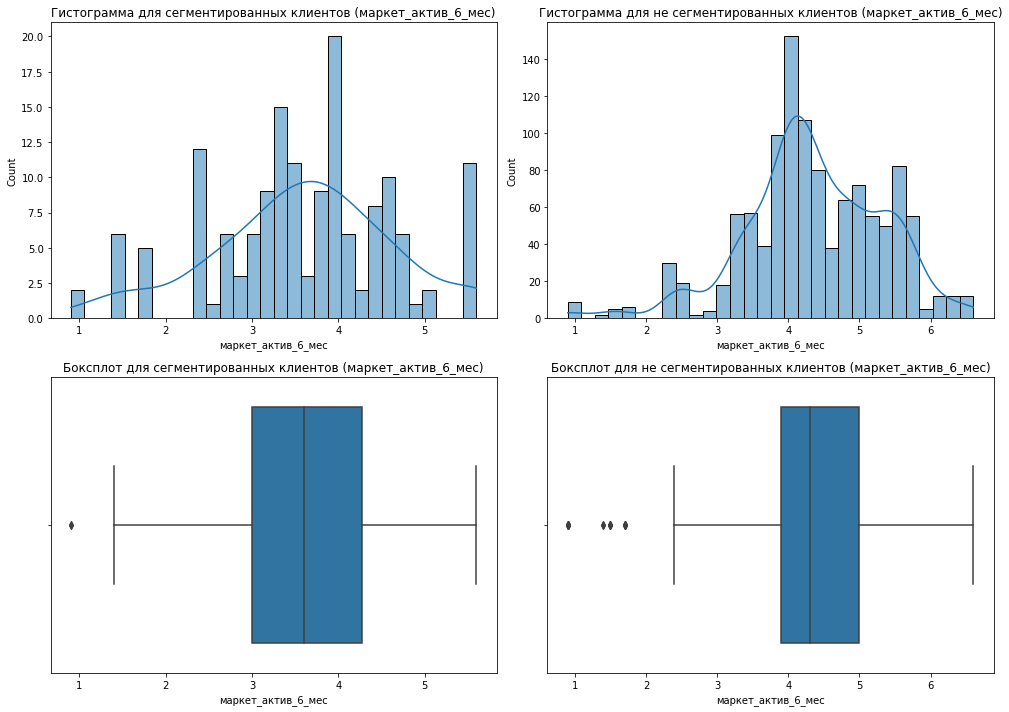

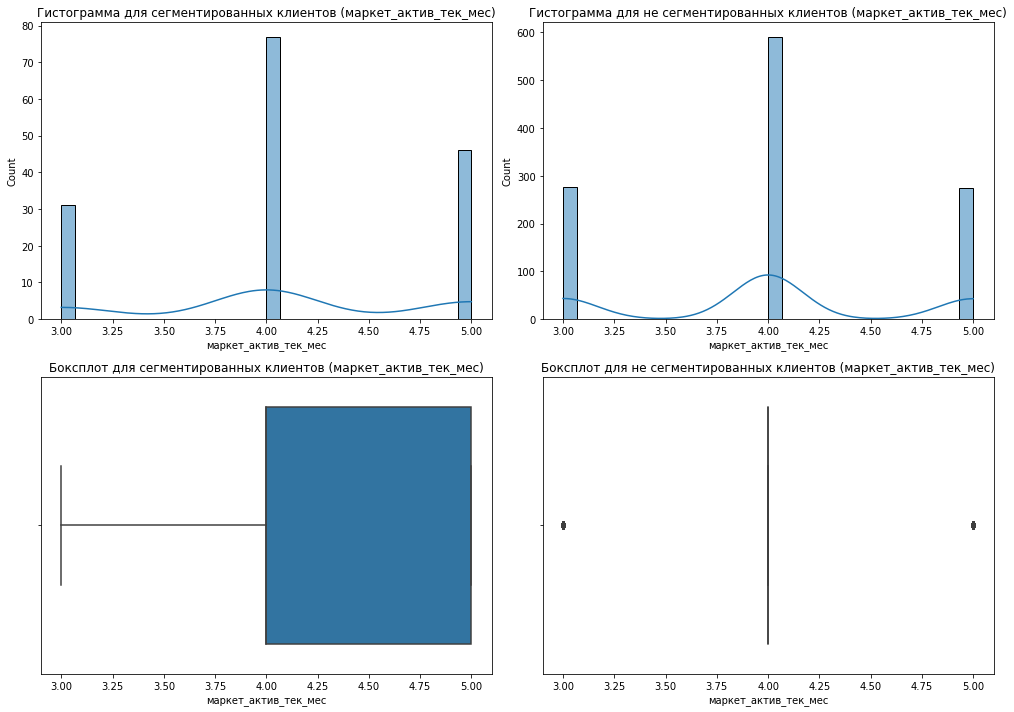

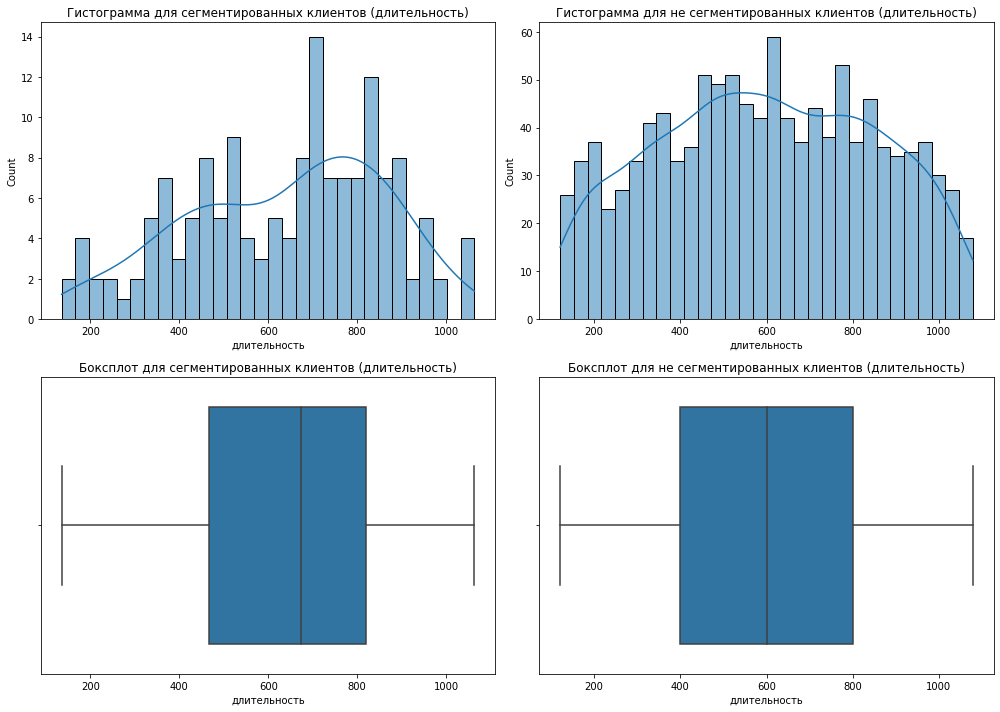

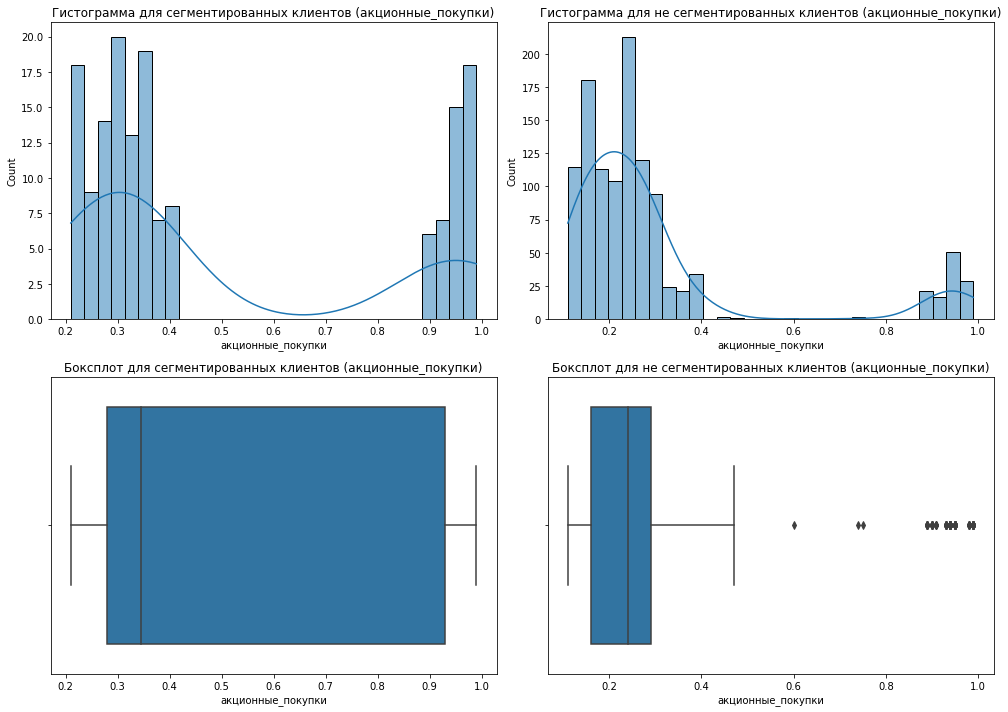

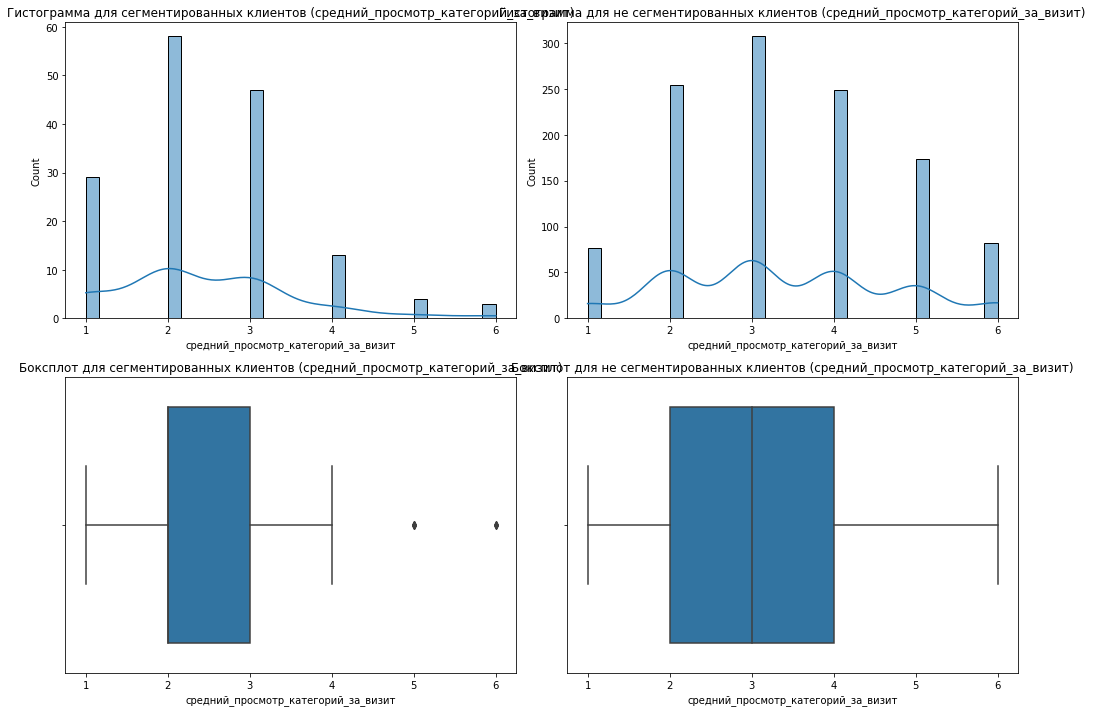

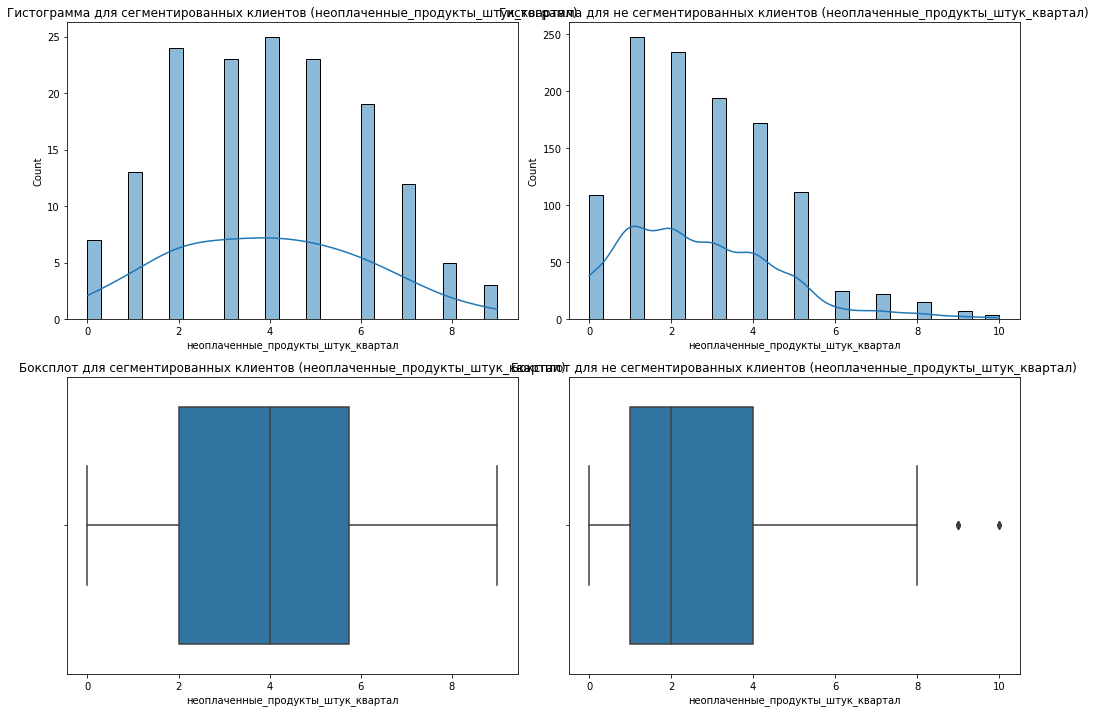

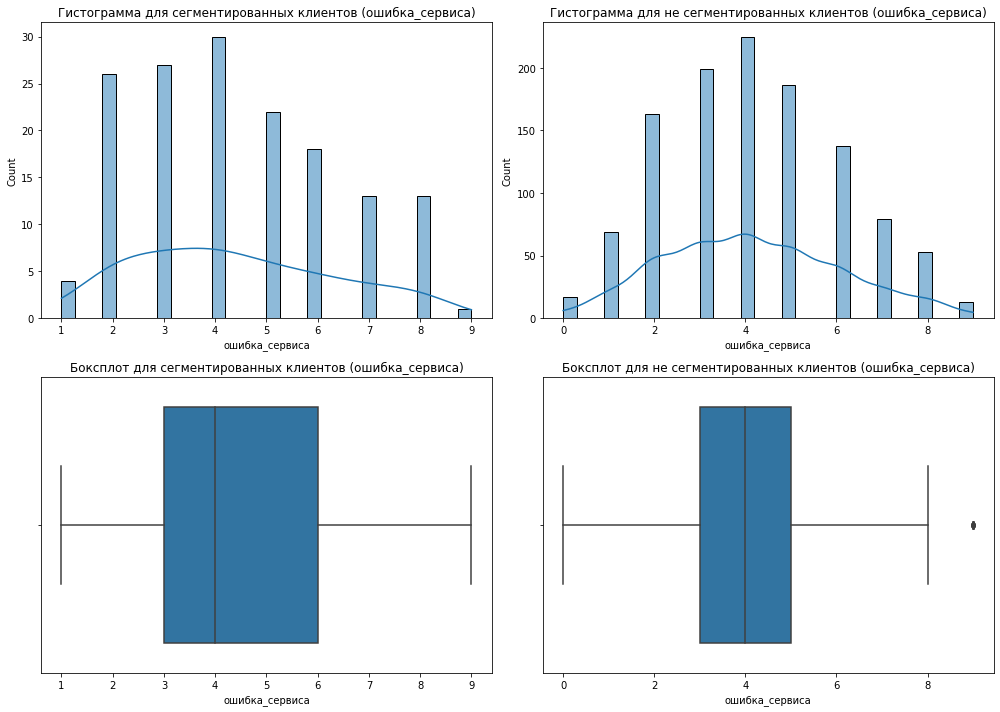

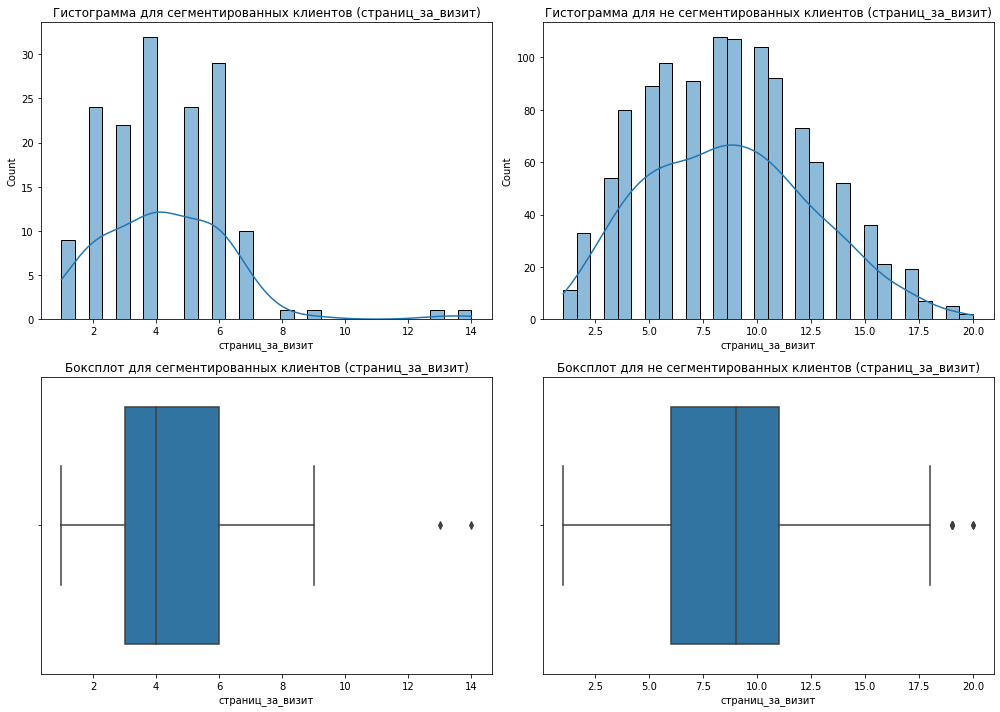

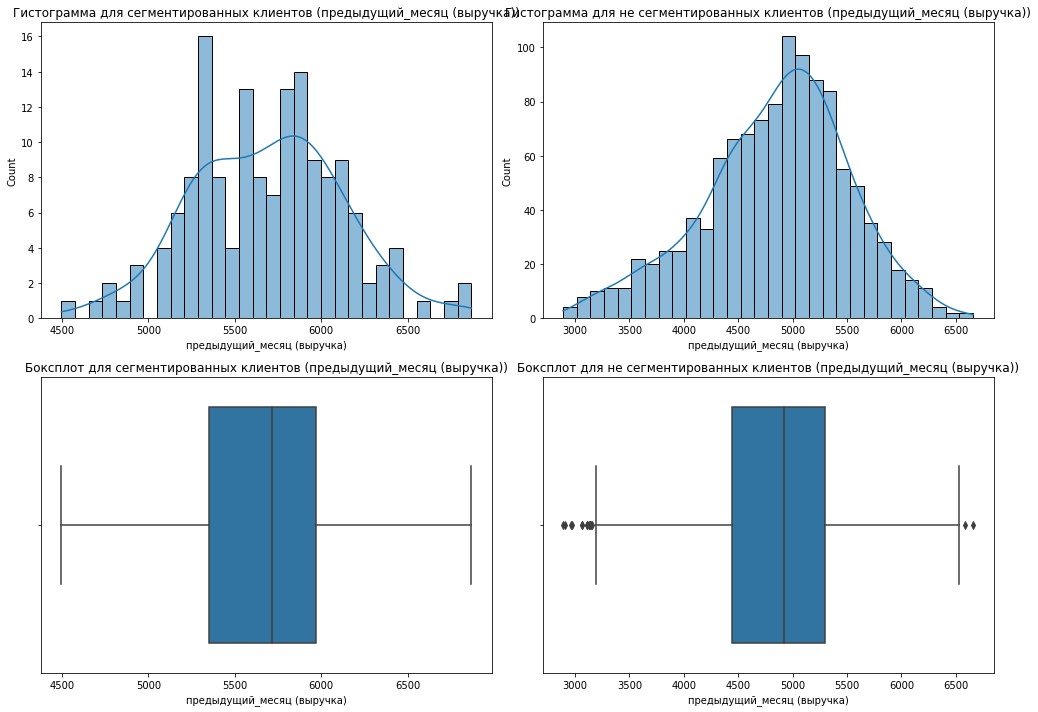

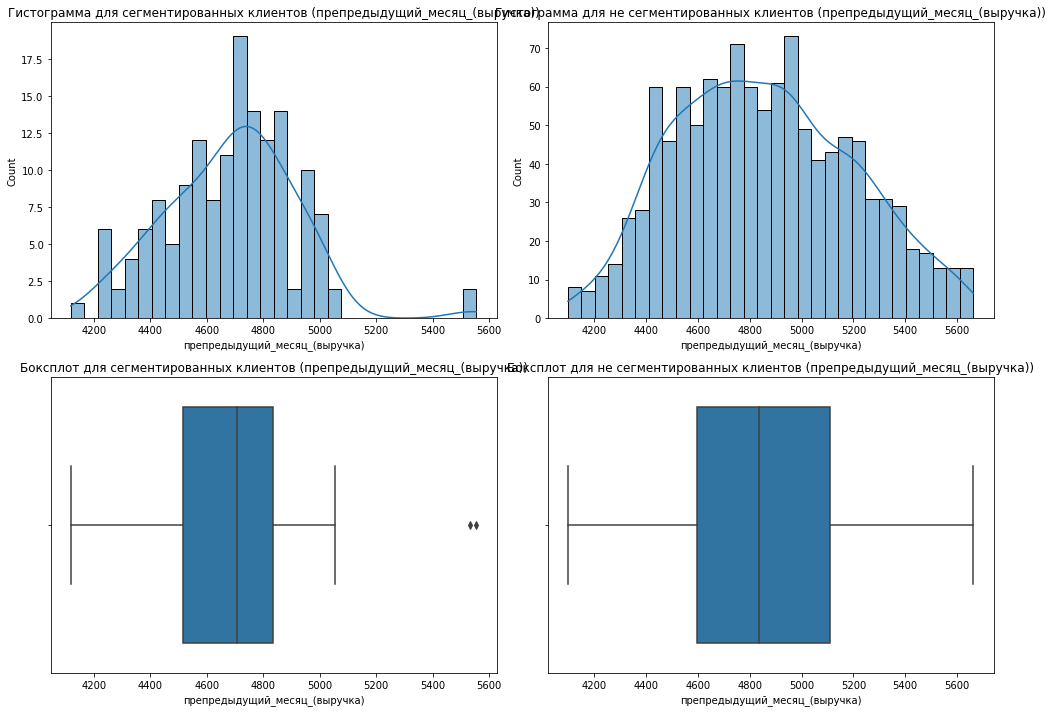

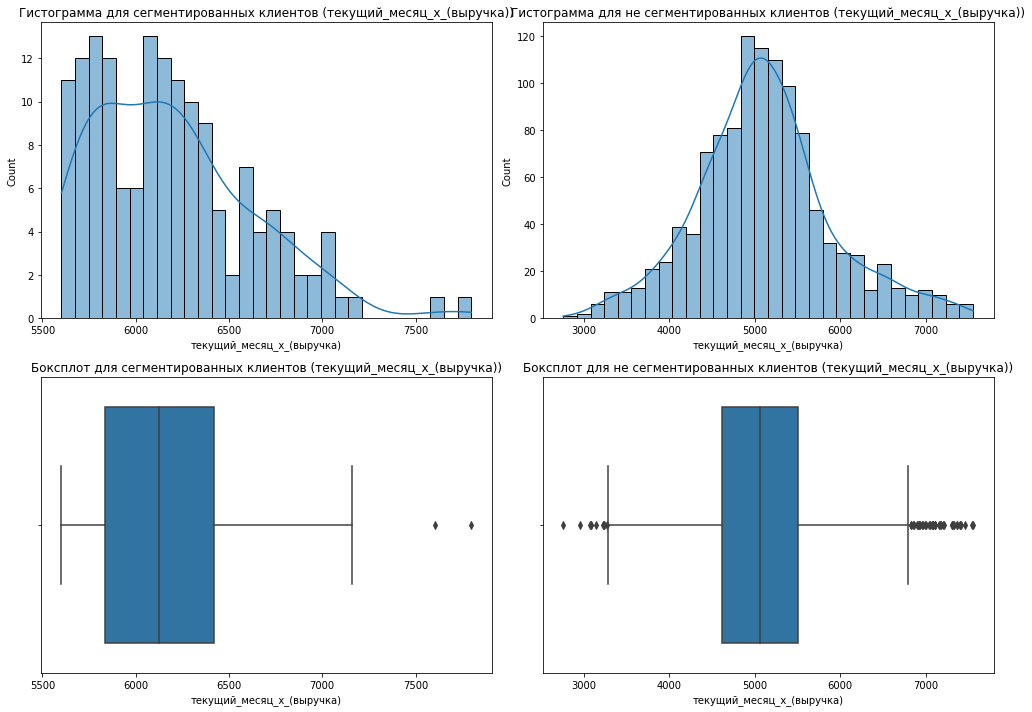

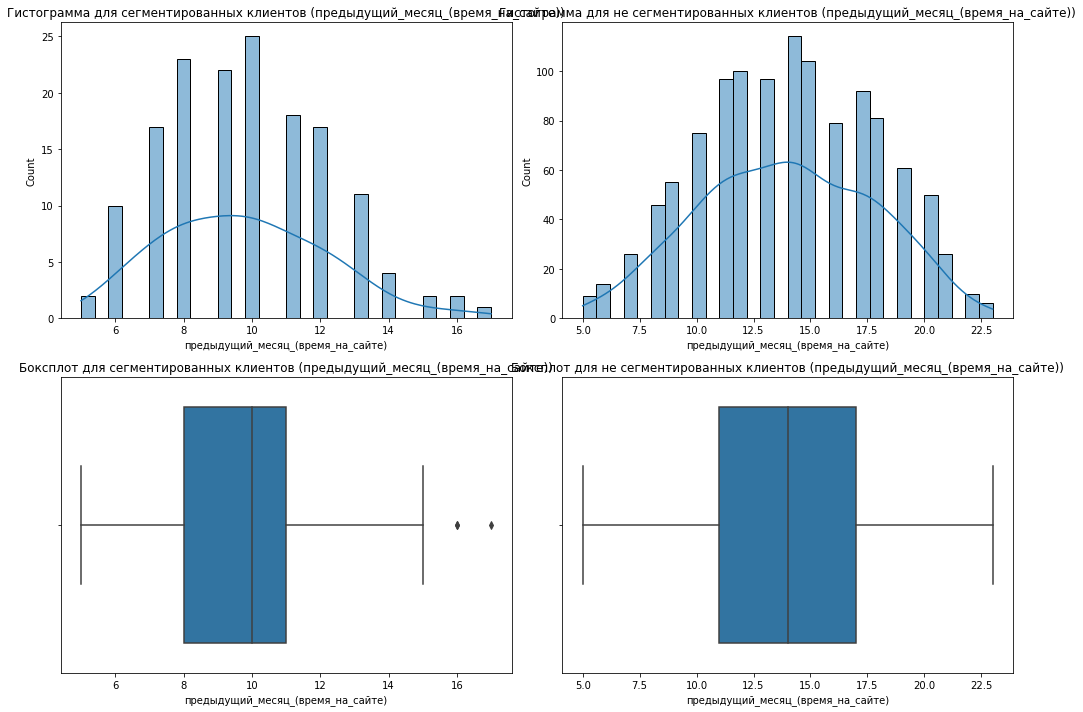

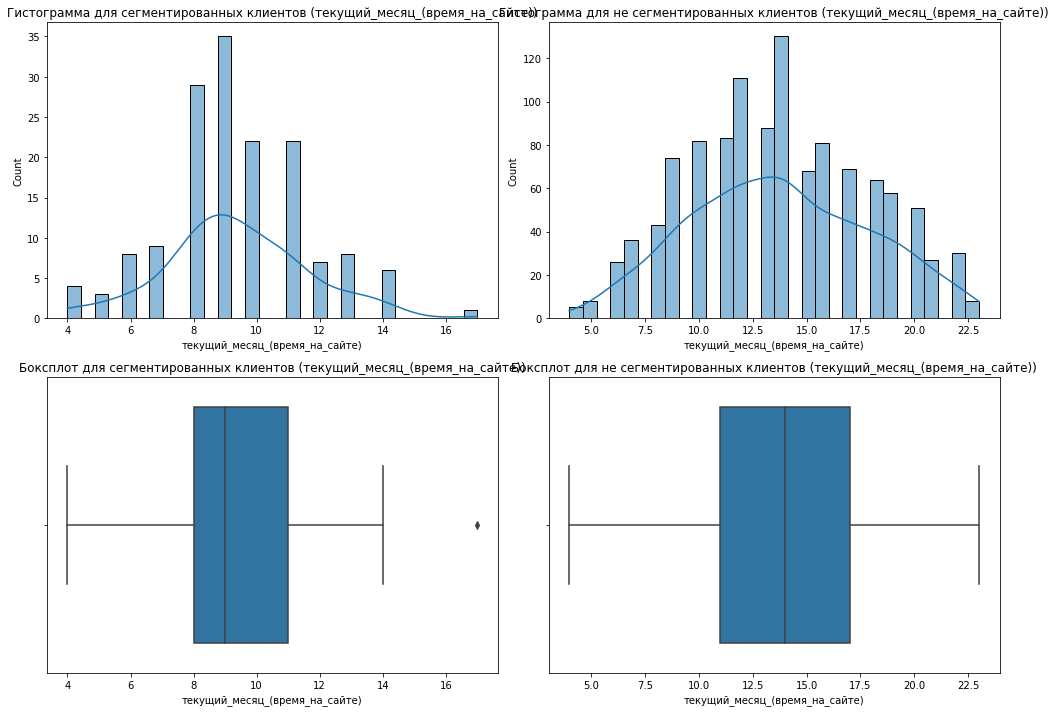

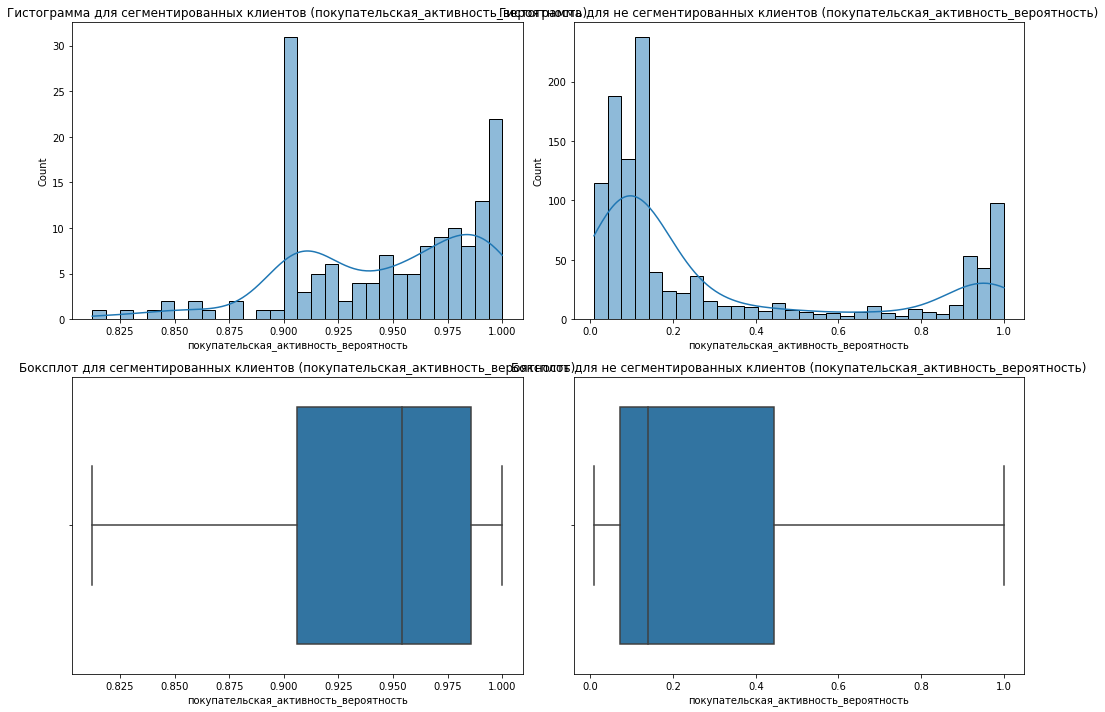

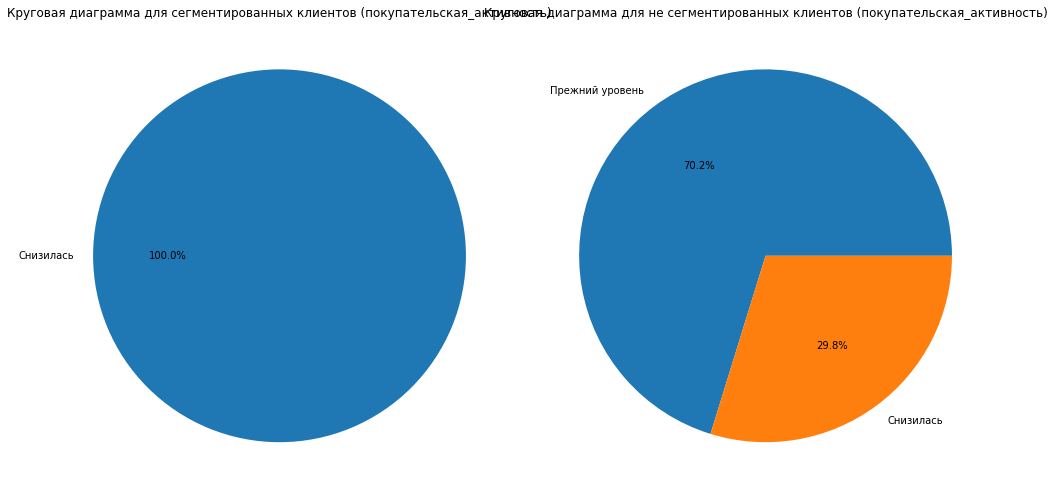

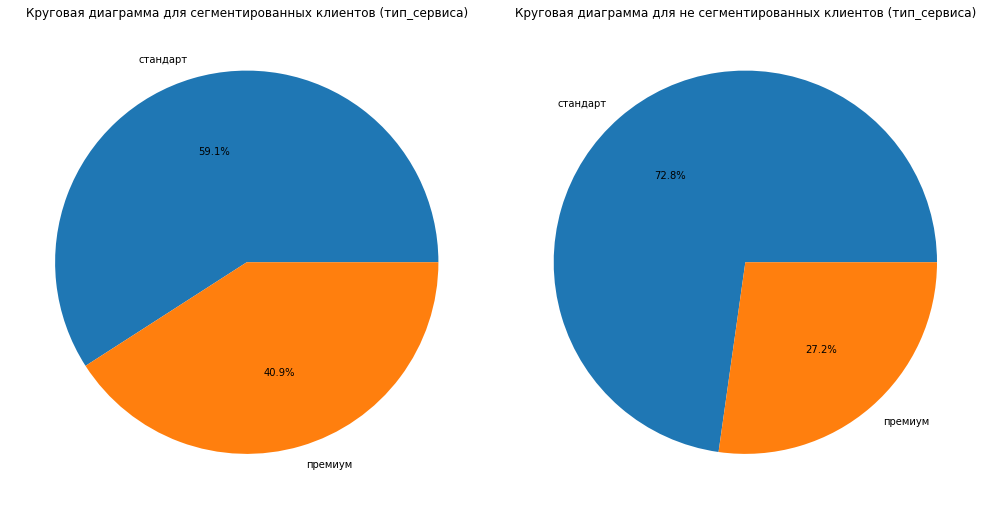

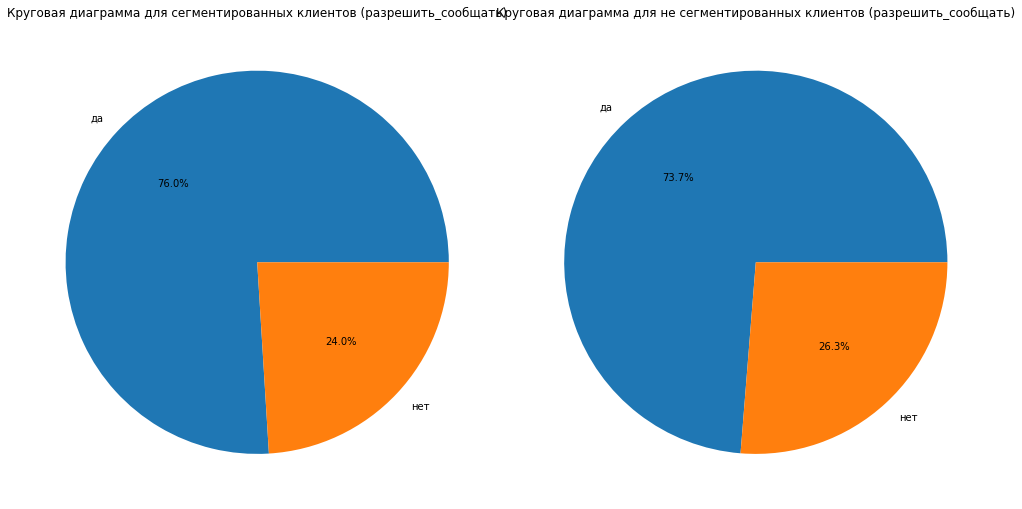

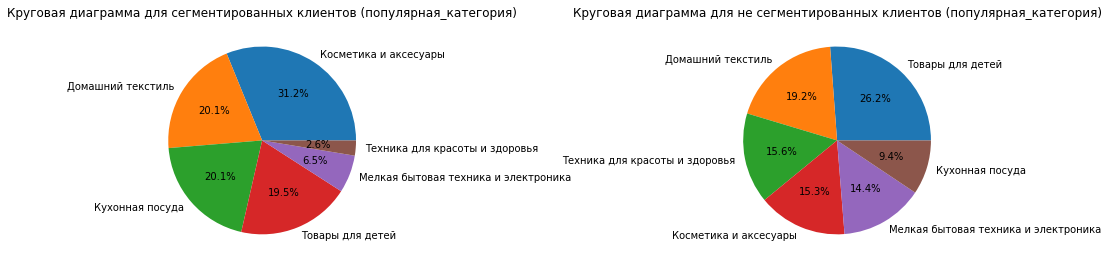

In [50]:
# Функция для построения гистограмм и боксплотов
def plot_histograms_and_boxplots(segmented, non_segmented, numerical_columns):
    for column in numerical_columns:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # Гистограмма для сегментированных клиентов
        sns.histplot(segmented[column], bins=30, kde=True, ax=axes[0, 0])
        axes[0, 0].set_title(f'Гистограмма для сегментированных клиентов ({column})')
        
        # Гистограмма для не сегментированных клиентов
        sns.histplot(non_segmented[column], bins=30, kde=True, ax=axes[0, 1])
        axes[0, 1].set_title(f'Гистограмма для не сегментированных клиентов ({column})')
        
        # Боксплот для сегментированных клиентов
        sns.boxplot(x=segmented[column], ax=axes[1, 0])
        axes[1, 0].set_title(f'Боксплот для сегментированных клиентов ({column})')
        
        # Боксплот для не сегментированных клиентов
        sns.boxplot(x=non_segmented[column], ax=axes[1, 1])
        axes[1, 1].set_title(f'Боксплот для не сегментированных клиентов ({column})')
        
        plt.tight_layout()
        plt.show()

# Функция для построения круговых диаграмм
def plot_pie_charts(segmented, non_segmented, categorical_columns):
    for column in categorical_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 7))
        
        # Круговая диаграмма для сегментированных клиентов
        segmented[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
        axes[0].set_title(f'Круговая диаграмма для сегментированных клиентов ({column})')
        axes[0].set_ylabel('')
        
        # Круговая диаграмма для не сегментированных клиентов
        non_segmented[column].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
        axes[1].set_title(f'Круговая диаграмма для не сегментированных клиентов ({column})')
        axes[1].set_ylabel('')
        
        plt.tight_layout()
        plt.show()

# Определение числовых столбцов
numerical_columns = market_df.select_dtypes(include=['int64', 'float64']).columns

# Определение категориальных столбцов
categorical_columns = market_df.select_dtypes(include=['object']).columns

# Выделение сегмента
segmented_customers = market_df[
    (market_df['текущий_месяц_x_(выручка)'] > выручка_threshold) &
    (market_df['покупательская_активность_вероятность'] > вероятность_threshold)
]

# Выделение клиентов, которые не принадлежат сегменту
non_segmented_customers = market_df[
    (market_df['текущий_месяц_x_(выручка)'] <= выручка_threshold) |
    (market_df['покупательская_активность_вероятность'] <= вероятность_threshold)
]

# Построение гистограмм и боксплотов для числовых столбцов
plot_histograms_and_boxplots(segmented_customers, non_segmented_customers, numerical_columns)

# Построение круговых диаграмм для категориальных столбцов
plot_pie_charts(segmented_customers, non_segmented_customers, categorical_columns)

###### Составляем портрет клиента по полученным графикам
- чуть меньше маркетинговых коммуникаций
- акционных покупок либо немного (до 0.4), либо много (0.9 и выше), но это характерно для всех клиентов
- смотрят меньше категорий
- оставляют обычно больше неоплаченных покупок
- чаще сталкиваются с ошибками сервиса
- открывают меньше страниц за визит
- меньше времени на сайте
- гораздо чаще используют тип сервиса «премиум»
- основные категории: «косметика и аксессуары» и «домашний текстиль», тогда как у несегментированных клиентов «товары для детей»
- сегментированные клиенты практически не покупают товары категорий «техника для красоты и здоровья» и «мелкая бытовая техника и электроника» по сравнению с несегментированными клиентами

### Вывод по шагу 8
- Проанализировали сегмент клиентов с выручкой выше 70% клиентов и высокой вероятностью снижения покупательской активности (80%)

###### Выводы и рекомендации по сегменту:


- Увеличение маркетинговых коммуникаций:

    - Персонализированные предложения: Учитывая, что у сегментированных клиентов меньше маркетинговых коммуникаций, можно увеличить количество персонализированных предложений, особенно для категорий «косметика и аксессуары» и «домашний текстиль».
    - Премиум-услуги: Эти клиенты часто используют тип сервиса «премиум». Продвигайте премиум-услуги с акцентом на эксклюзивные предложения и привилегии.


- Увеличение покупок по акции:

    - Оптимизация акций: Для клиентов, которые редко покупают по акциям, можно проводить специальные акции и скидки для премиум-клиентов, делая их более привлекательными.
    - Акционные кампании: Продвигайте акции на товары, которые редко покупают клиенты сегмента (например, «техника для красоты и здоровья» и «мелкая бытовая техника и электроника»), чтобы стимулировать их интерес.


- Улучшение пользовательского опыта на сайте:
    - Снижение количества ошибок сервиса: Обеспечьте стабильную работу сервиса, минимизируйте ошибки и сбои, чтобы улучшить пользовательский опыт.
    - Увеличение вовлеченности: Увеличьте количество страниц, которые клиенты просматривают за визит. Это можно сделать с помощью рекомендационных систем и улучшения навигации по сайту.
    - Оптимизация времени на сайте: Увеличьте время, которое клиенты проводят на сайте, предоставляя интересный и полезный контент, акции, блог-посты и обзоры.



- Снижение количества неоплаченных покупок:
    - Упрощение процесса оплаты: Сделайте процесс оплаты максимально простым и удобным, добавив различные методы оплаты и обеспечив надежную работу платежных систем.
    - Напоминания и скидки на неоплаченные покупки: Вводите систему напоминаний о неоплаченных товарах и предлагайте скидки, если покупка будет завершена в течение определенного времени.

### Шаг 9. Общий вывод
###### Описание задачи
Основная задача проекта заключалась в прогнозировании покупательской активности клиентов интернет-магазина. Конкретно, необходимо было выявить клиентов с высокой вероятностью снижения покупательской активности и предложить стратегические рекомендации для удержания таких клиентов.

###### Описание исходных данных и проведённая предобработка
Входные данные содержали информацию о покупательской активности, типе сервиса, маркетинговых акциях, покупках по акции, просмотре категорий за визит, неоплаченных продуктах и других признаках. Данные были собраны за несколько месяцев для каждого клиента, включающие текущую, предыдущую и предпредыдущую выручку и время, проведенное на сайте.

###### Основные шаги предобработки данных:

- Удаление признаков, не влияющих на прогнозирование: Из данных были удалены признаки, не являющиеся полезными для анализа, такие как id.
- Разделение данных на тренировочную и тестовую выборки: Для оценки модели данные были разделены на тренировочную и тестовую выборки.
- Преобразование категориальных признаков: Использование One-Hot Encoding для преобразования категориальных признаков.
- Масштабирование числовых признаков: Применение StandardScaler и MinMaxScaler для числовых признаков, чтобы нормализовать их значения.
- Поиск лучшей модели


###### Для поиска наилучшей модели были использованы следующие шаги:
- Построение пайплайна: Создание пайплайна, который включал предобработку данных и обучение модели.
- Подбор гиперпараметров: Использование RandomizedSearchCV для поиска оптимальных гиперпараметров моделей. Рассматривались следующие модели:
    - DecisionTreeClassifier
    - KNeighborsClassifier
    - LogisticRegression
    - SVC (Support Vector Classifier)
- Лучшая модель оказалась SVC (использует метод опорных векторов) с гиперпараметрами: С = 3 (регуляризация) и линейным ядром
- Эта модель показала наилучшие результаты на тренировочной и тестовой выборках с точки зрения метрики ROC-AUC.



- Основные важные признаки клиентов включали:
    - страниц_за_визит
    - акционные_покупки
    - предыдущий_месяц_(время_на_сайте)
    - текущий_месяц_(время на сайте)
    - средний_просмотр_категорий_за_визит
    - неоплаченные_продукты_штук_квартал
    - маркет_актив_б_мес
    - предыдущий месяц (выручка)
    - препредыдущий_месяц (выручка)
    - текущий_месяц_х (выручка)


###### Выводы и дополнительные предложения для выбранного сегмента покупателей


Для анализа были выделены клиенты с высокой выручкой (70+%) и высокой вероятностью снижения покупательской активности (80+%).


После составления портрета клиента из выбранного сегмента мы предлагаем следующие рекомендации по сегменту:
- Увеличение маркетинговых коммуникаций:

    - Персонализированные предложения: Учитывая, что у сегментированных клиентов меньше маркетинговых коммуникаций, можно увеличить количество персонализированных предложений, особенно для категорий «косметика и аксессуары» и «домашний текстиль».
    - Премиум-услуги: Эти клиенты часто используют тип сервиса «премиум». Продвигайте премиум-услуги с акцентом на эксклюзивные предложения и привилегии.


- Увеличение покупок по акции:

    - Оптимизация акций: Для клиентов, которые редко покупают по акциям, можно проводить специальные акции и скидки для премиум-клиентов, делая их более привлекательными.
    - Акционные кампании: Продвигайте акции на товары, которые редко покупают клиенты сегмента (например, «техника для красоты и здоровья» и «мелкая бытовая техника и электроника»), чтобы стимулировать их интерес.


- Улучшение пользовательского опыта на сайте:
    - Снижение количества ошибок сервиса: Обеспечьте стабильную работу сервиса, минимизируйте ошибки и сбои, чтобы улучшить пользовательский опыт.
    - Увеличение вовлеченности: Увеличьте количество страниц, которые клиенты просматривают за визит. Это можно сделать с помощью рекомендационных систем и улучшения навигации по сайту.
    - Оптимизация времени на сайте: Увеличьте время, которое клиенты проводят на сайте, предоставляя интересный и полезный контент, акции, блог-посты и обзоры.



- Снижение количества неоплаченных покупок:
    - Упрощение процесса оплаты: Сделайте процесс оплаты максимально простым и удобным, добавив различные методы оплаты и обеспечив надежную работу платежных систем.
    - Напоминания и скидки на неоплаченные покупки: Вводите систему напоминаний о неоплаченных товарах и предлагайте скидки, если покупка будет завершена в течение определенного времени.

###### Основные рекомендации для увеличения покупательской активности:
- Анализ и оптимизация важнейших признаков:
    - Страниц_за_визит: Оптимизируйте структуру сайта, чтобы клиенты просматривали больше страниц. Это можно сделать с помощью рекомендаций, связанных товаров, блогов и полезных статей.
    - Акционные_покупки: Улучшите стратегию акций и скидок, сделайте их более заметными и привлекательными для всех клиентов.
    - Средний_просмотр_категорий_за_визит: Стимулируйте клиентов исследовать больше категорий через рекомендации и персонализированные предложения.


- Увеличение выручки:
    - Текущий месяц (выручка): Проанализируйте текущие месяцы с высокой выручкой и идентифицируйте успешные стратегии, чтобы масштабировать их.
    - Предыдущий и препредыдущий месяцы (выручка): Анализируйте данные за предыдущие месяцы, чтобы понять сезонные тенденции и планировать маркетинговые кампании.


- Повышение времени на сайте:
    - Предыдущий месяц (время на сайте): Оцените действия, которые привели к увеличению времени на сайте, и попытайтесь воспроизвести эти действия в текущем месяце.
    - Текущий месяц (время на сайте): Используйте данные о поведении клиентов для создания более захватывающего и интересного контента, который будет удерживать клиентов на сайте дольше.


- Маркетинговая активность:
    - Маркетинговые активности в течение месяца: Поддерживайте высокий уровень маркетинговых активностей, такие как рассылки, рекламные кампании, акции и скидки, чтобы удерживать внимание клиентов и стимулировать повторные покупки.